<a href="https://colab.research.google.com/github/elizabethyoo/team_9/blob/EDA_linegraphs/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [238]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib import animation as animation
import matplotlib.dates as mdates

# Plot imports
import plotly as py
import plotly.graph_objs as go

## Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/group_9/Datasets/hps_sbps_unemp_vac.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   state                                   800 non-null    object 
 1   Date                                    800 non-null    object 
 2   year                                    800 non-null    int64  
 3   month                                   800 non-null    int64  
 4   age_18_24                               800 non-null    float64
 5   age_25_39                               800 non-null    float64
 6   age_40                                  800 non-null    float64
 7   age_50                                  800 non-null    float64
 8   age_60                                  800 non-null    float64
 9   age_70_up                               800 non-null    float64
 10  child                                   800 non-null    float6

In [91]:
df.head()

state  ... Additional_Doses_65Plus_Vax_Pct
Date              ...                                
2020-04-30    AK  ...                             nan
2020-05-31    AK  ...                             nan
2020-06-30    AK  ...                             nan
2020-08-31    AK  ...                             nan
2020-09-30    AK  ...                             nan

[5 rows x 62 columns]

In [18]:
df.overall_sentiment.describe()

count   800.00
mean     -0.46
std       0.10
min      -0.77
25%      -0.52
50%      -0.45
75%      -0.40
max      -0.22
Name: overall_sentiment, dtype: float64

In [29]:
df.set_index(df['Date'], inplace =True)

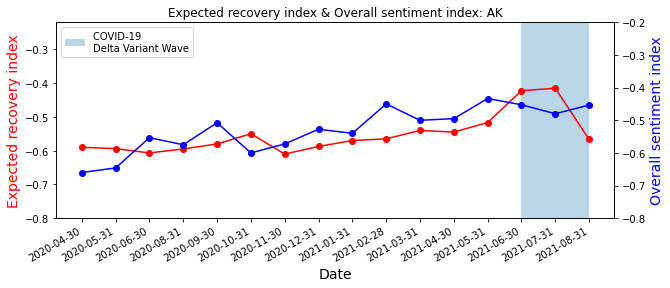

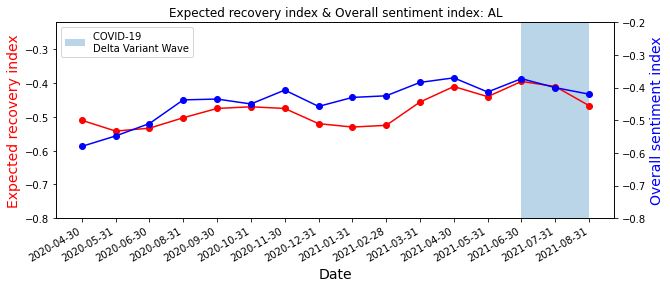

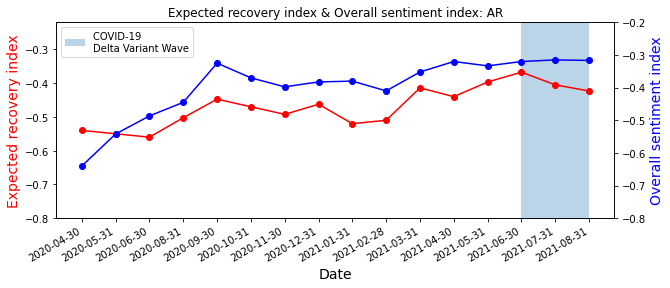

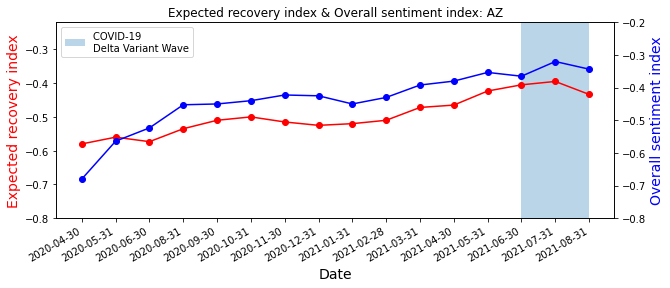

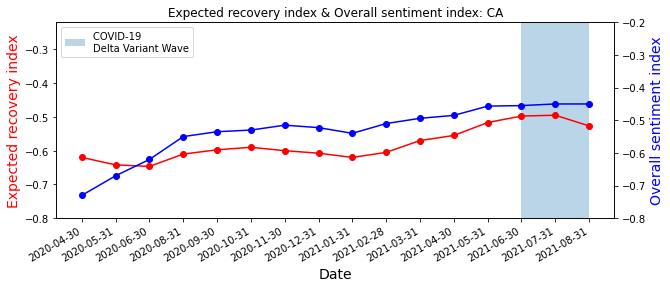

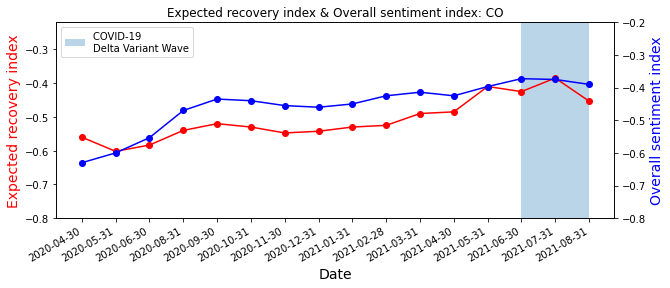

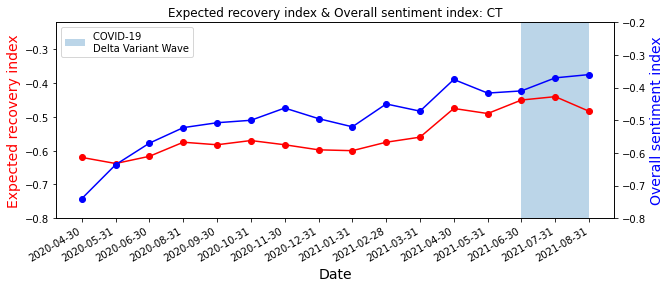

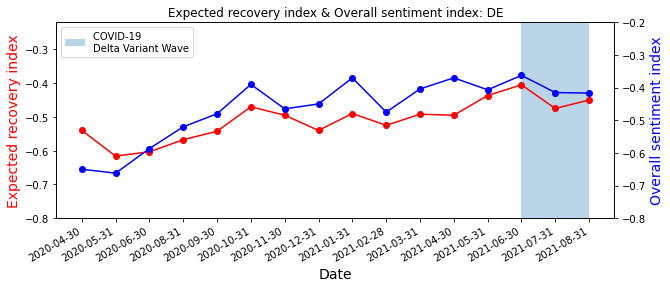

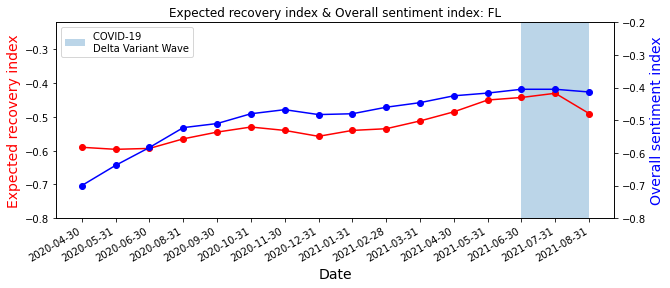

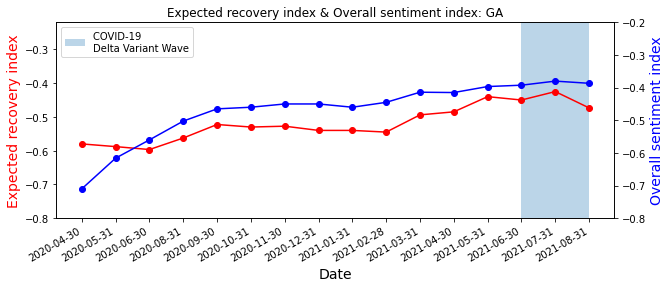

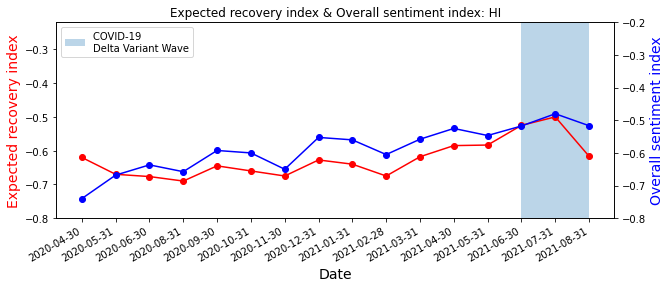

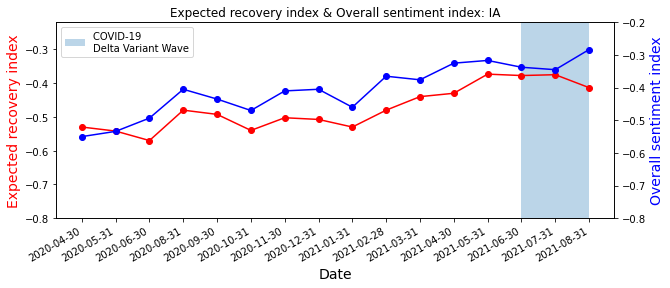

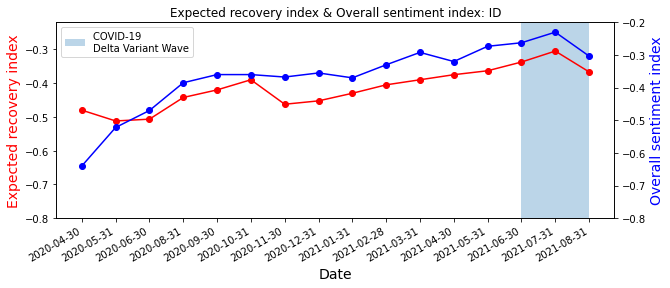

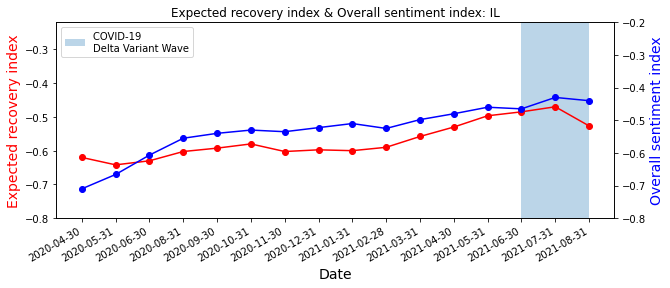

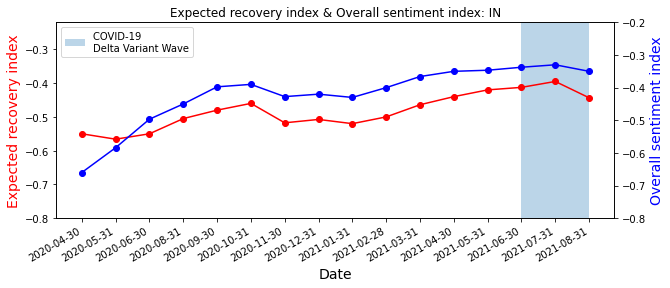

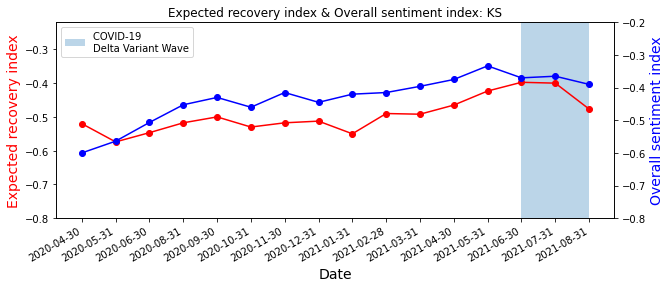

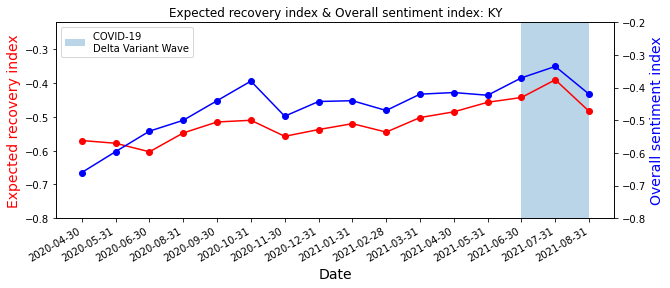

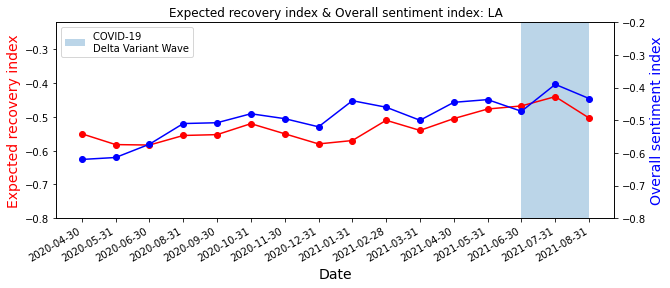

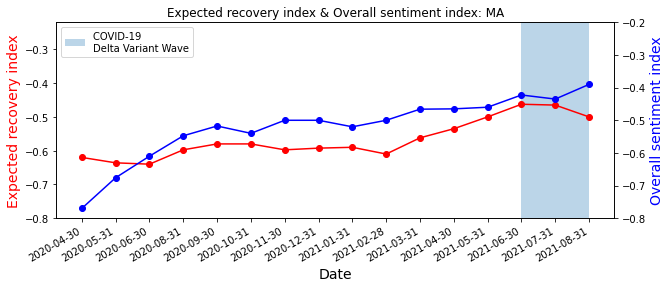

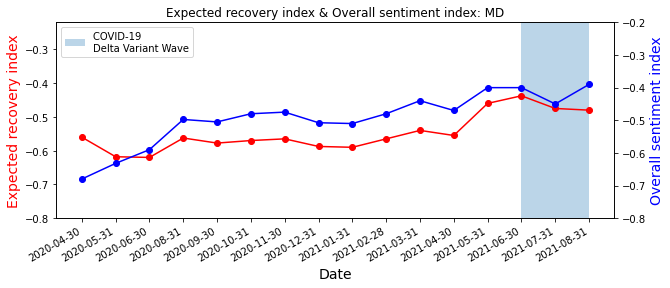

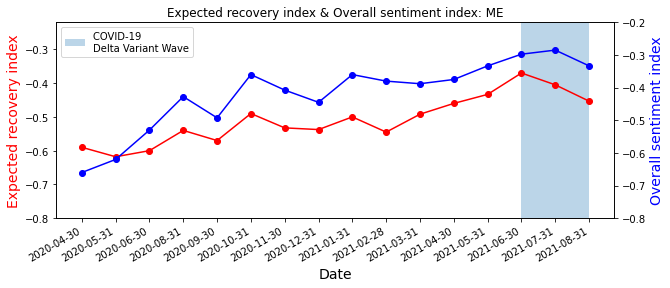

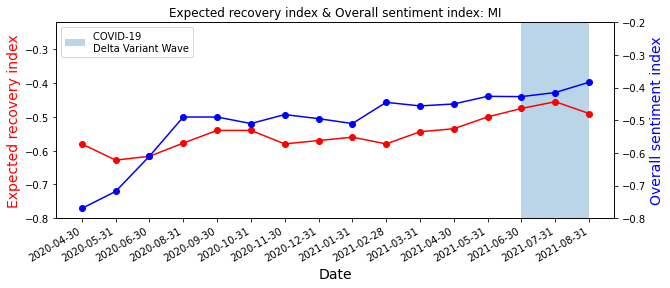

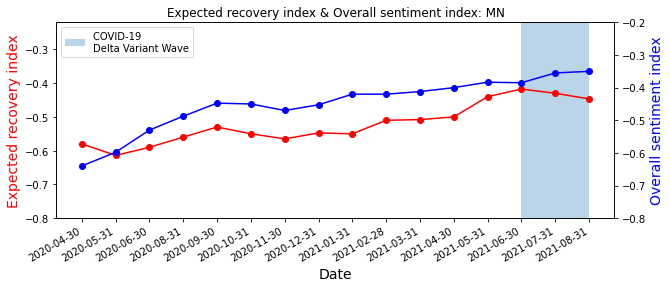

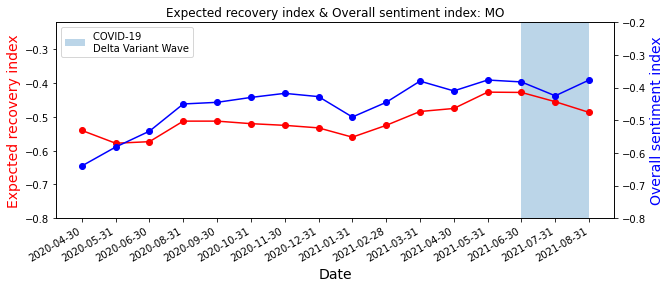

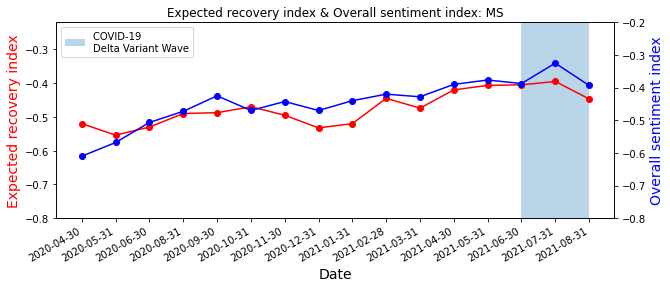

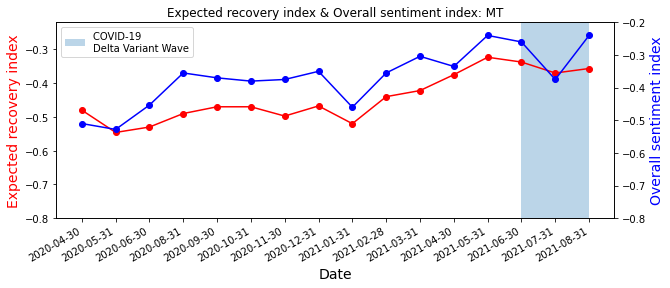

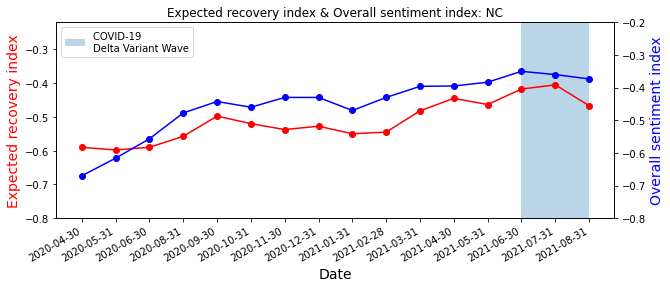

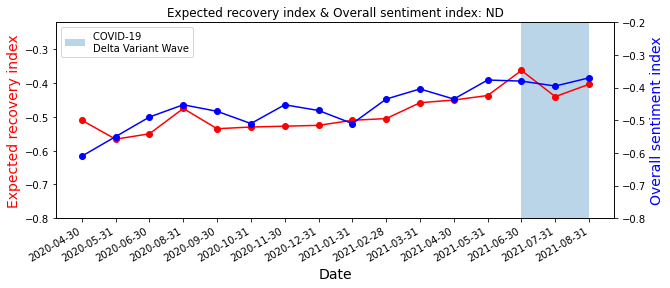

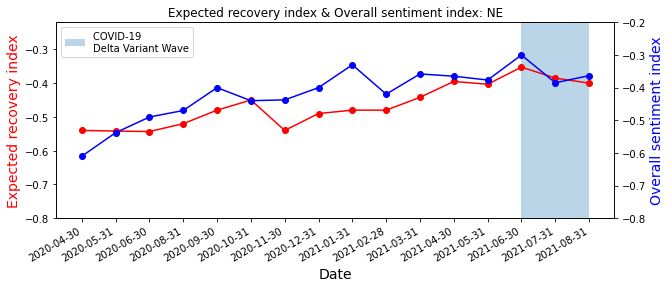

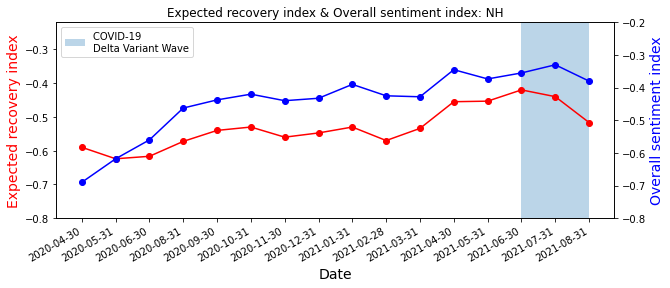

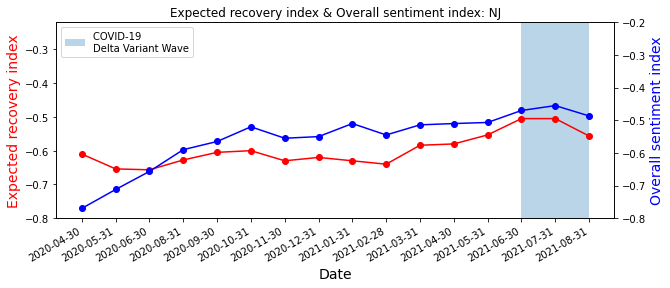

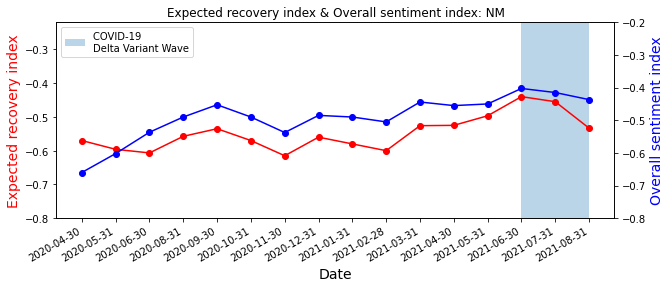

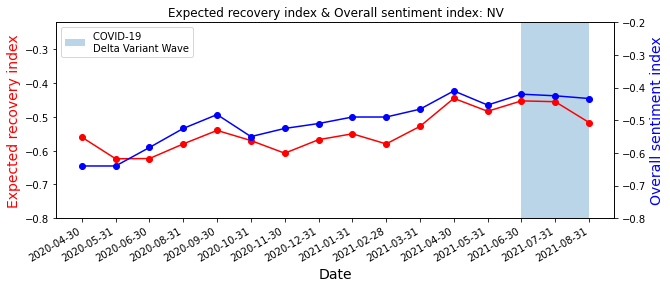

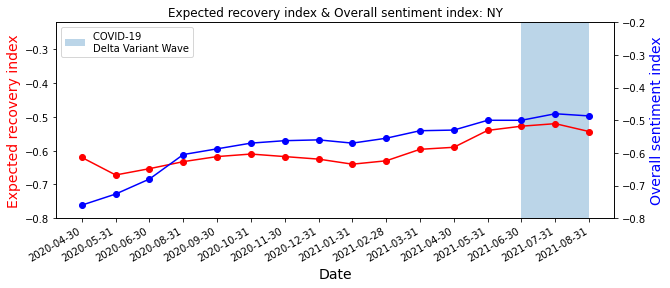

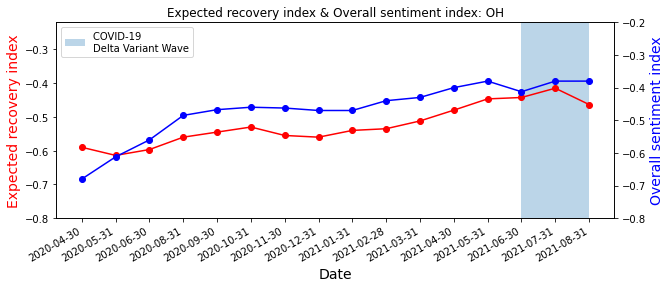

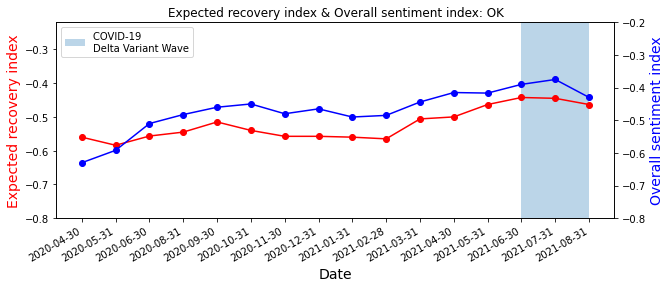

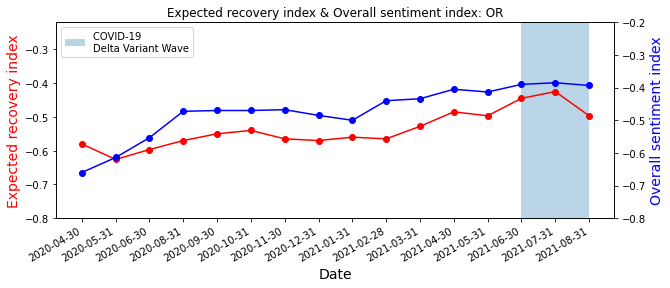

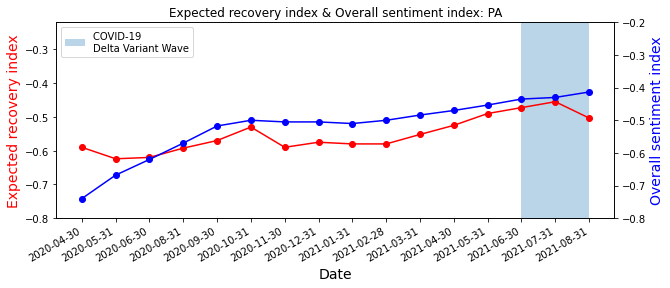

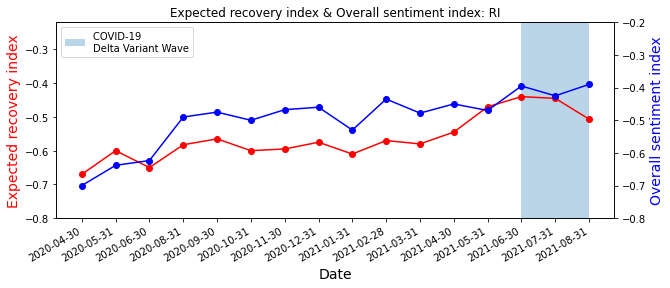

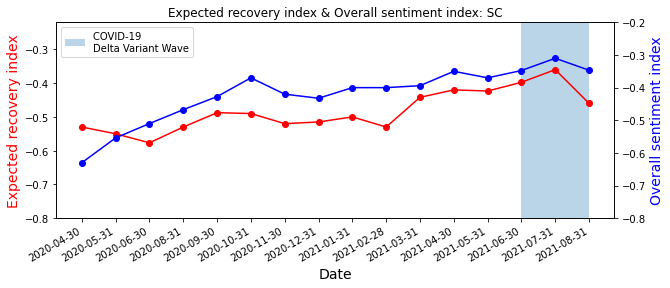

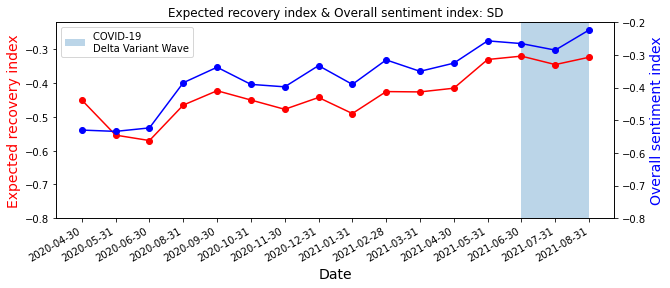

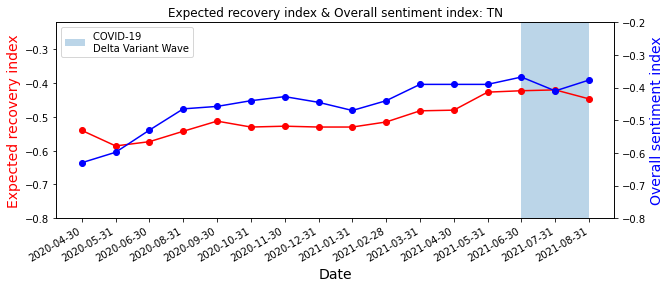

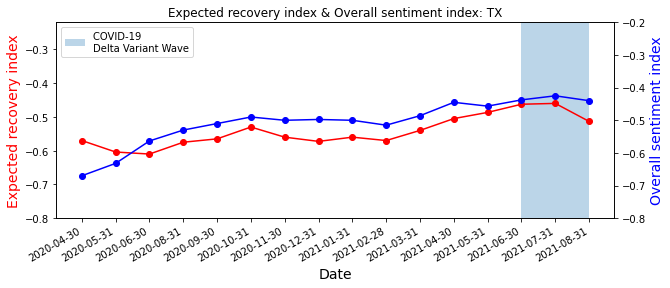

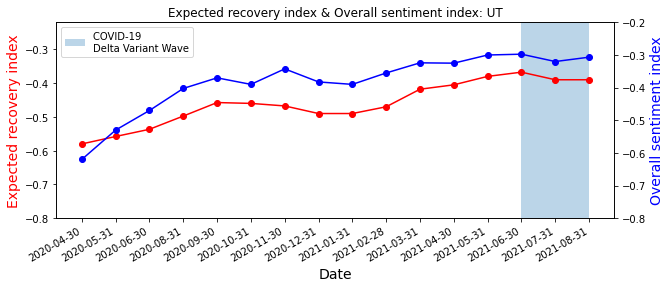

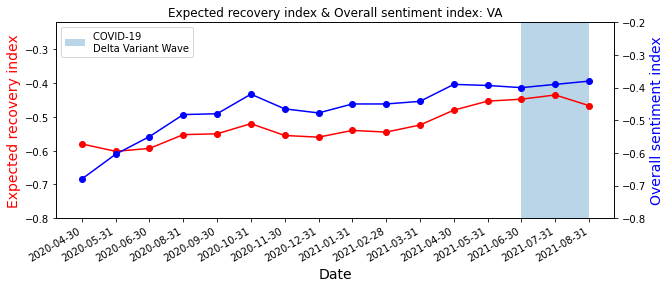

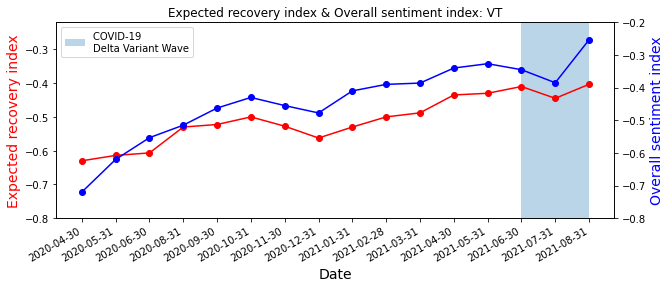

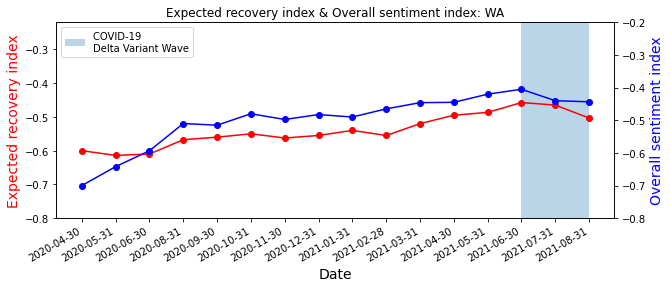

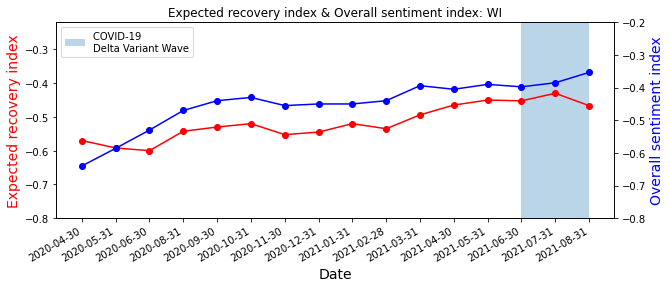

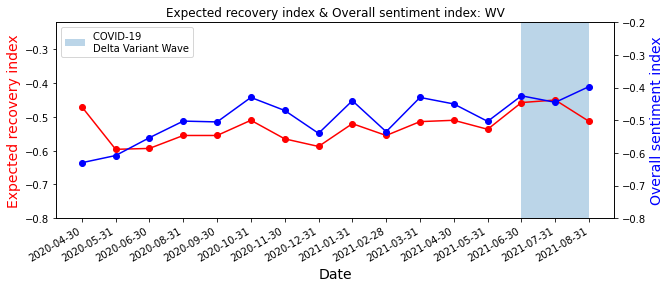

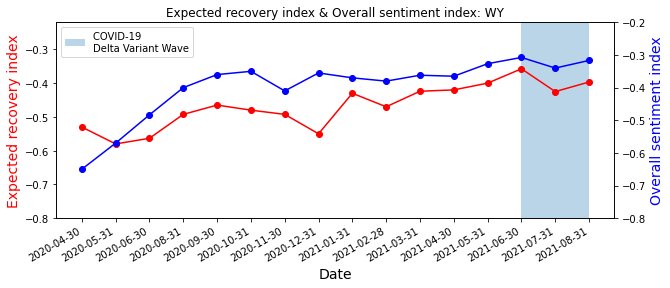

In [186]:
for state  in df.state.unique():
   feature_1 ='expected_recovery'
   feature_2 = 'overall_sentiment'
   title = 'Expected recovery index & Overall sentiment index: '
   df_state = df.loc[df['state']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-0.8,-0.22])
   ax.set_ylabel('Expected recovery index',color="red",fontsize=14)
    
   fmt_half_year = mdates.MonthLocator(interval=3)
   ax.xaxis.set_major_locator(fmt_half_year)

   # Minor ticks every month.
   fmt_month = mdates.MonthLocator()
   ax.xaxis.set_minor_locator(fmt_month)

   # Text in the x axis will be displayed in 'YYYY-mm' format.
   ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel('Overall sentiment index',color="blue",fontsize=14)
   ax2.set_ylim([-0.8,-0.2])
   plt.title(title +state)
   rect =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.3)
   ax.legend([rect], ['COVID-19 \nDelta Variant Wave'], loc=2)
   fig.autofmt_xdate()
   plt.show()

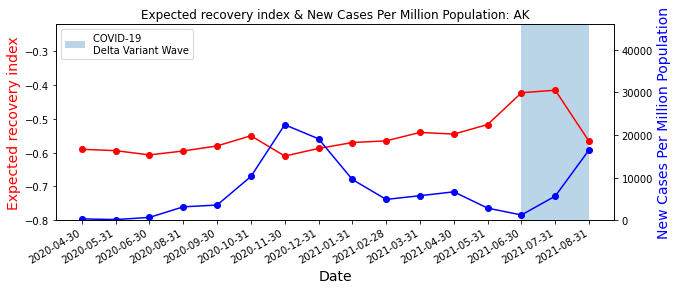

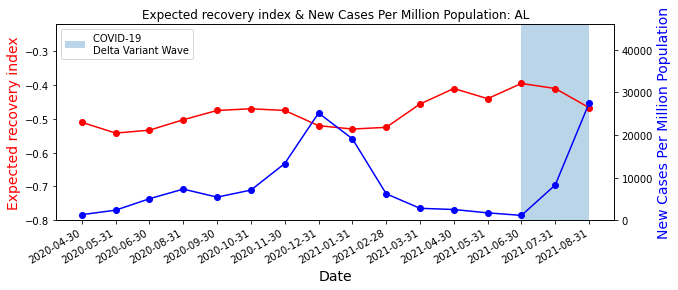

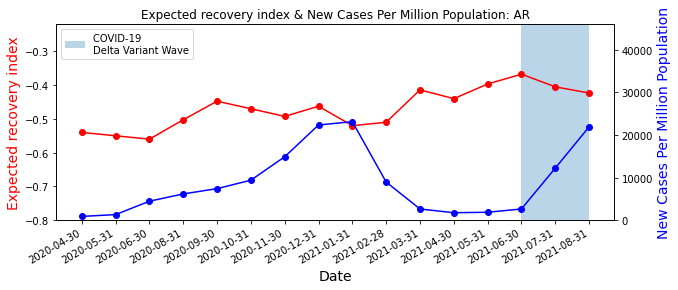

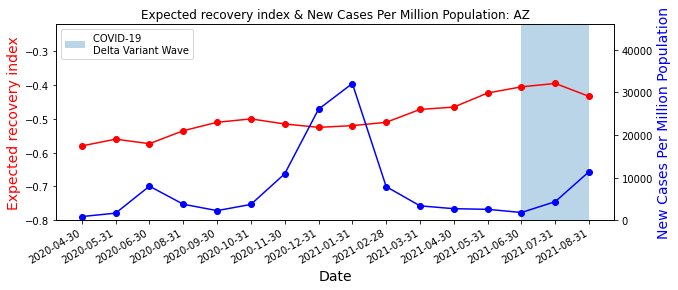

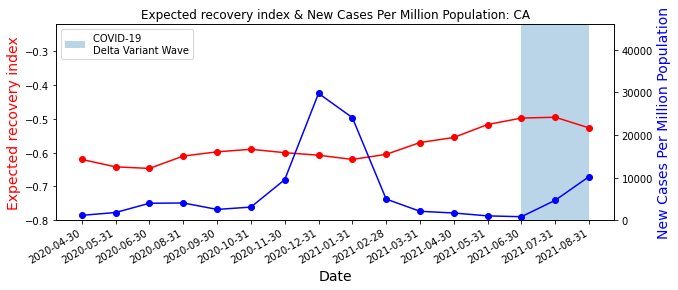

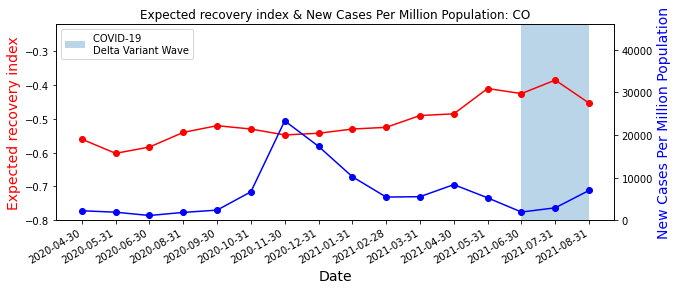

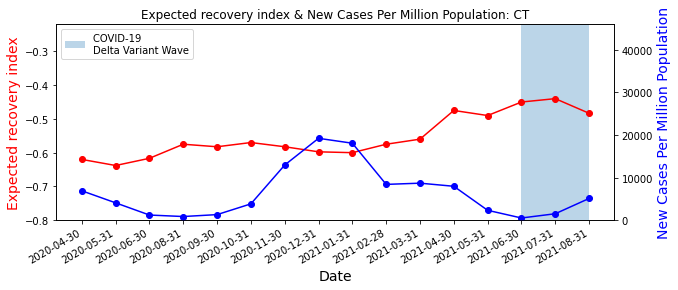

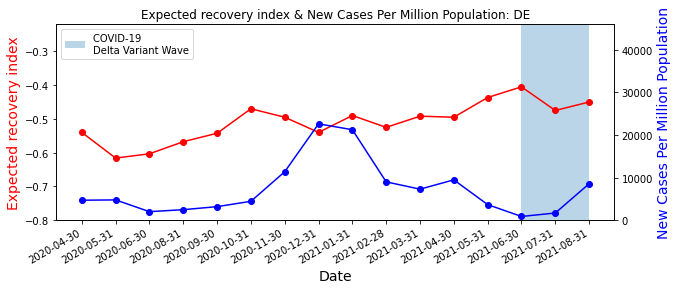

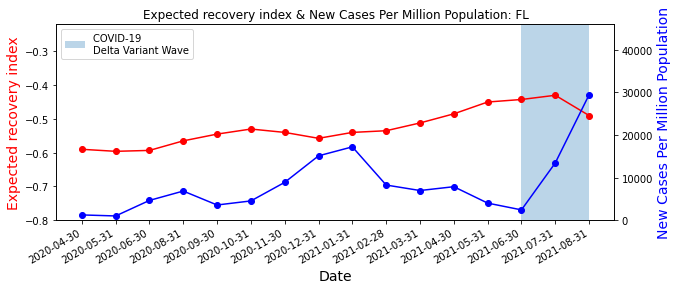

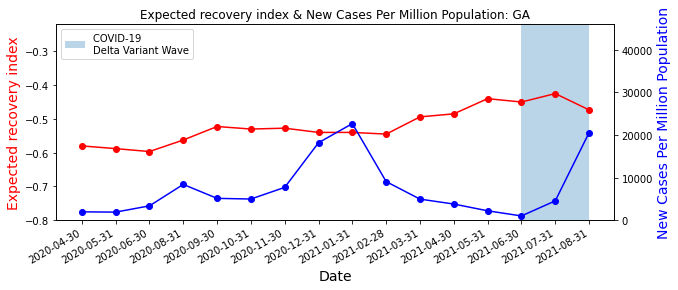

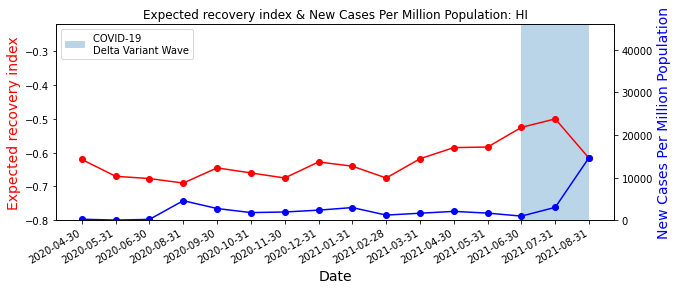

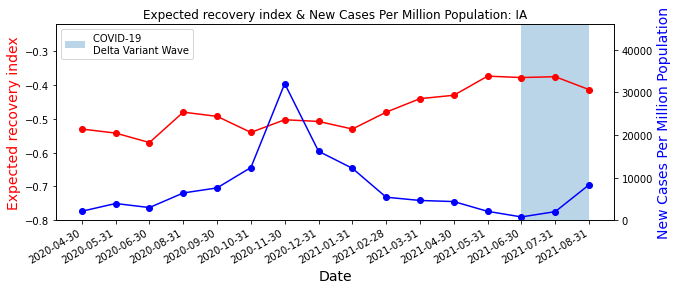

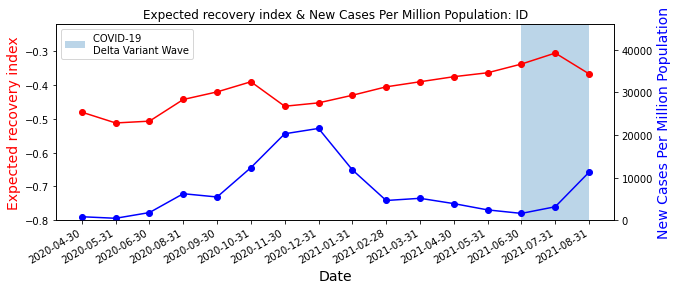

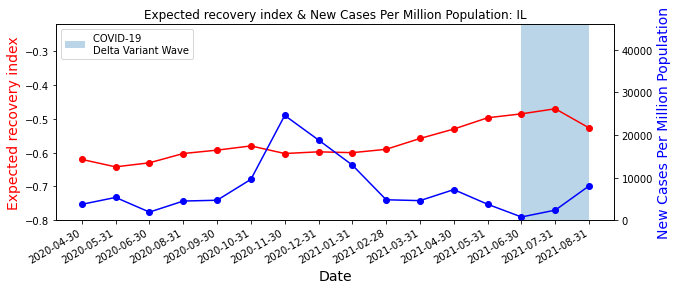

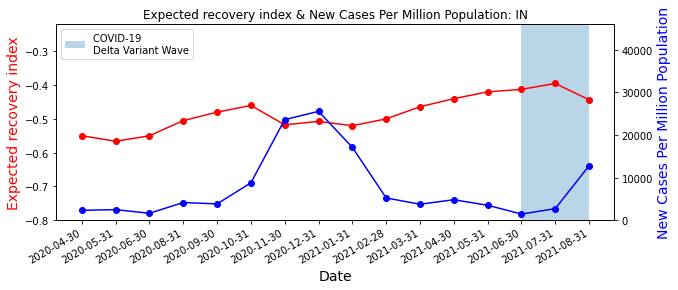

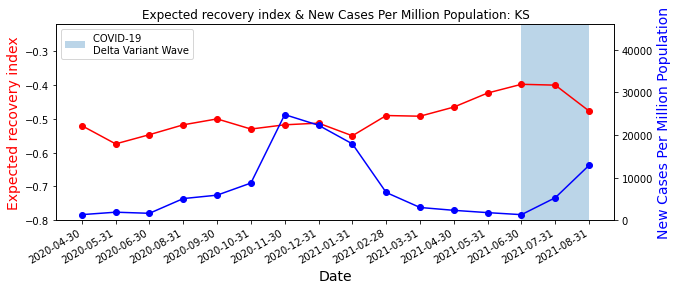

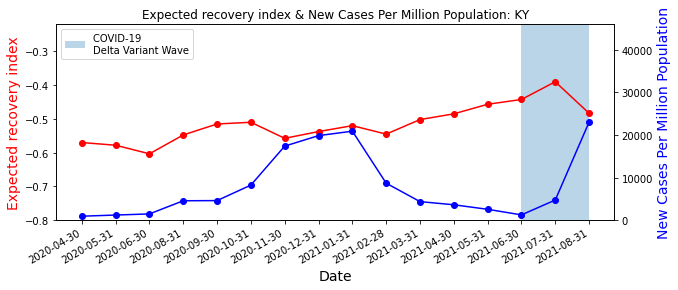

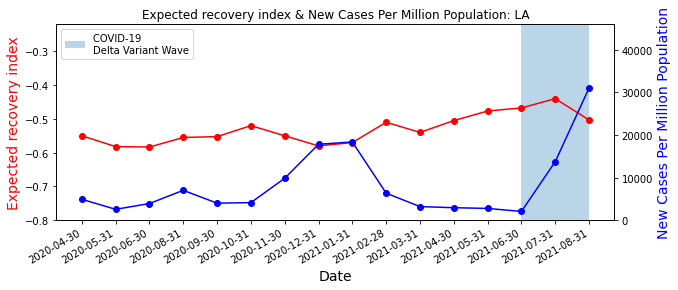

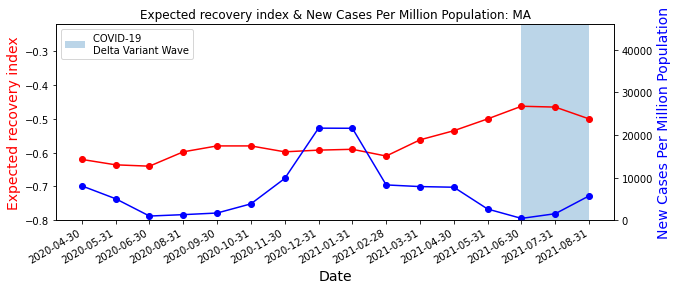

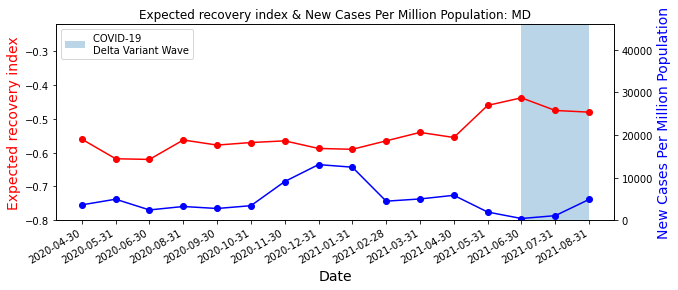

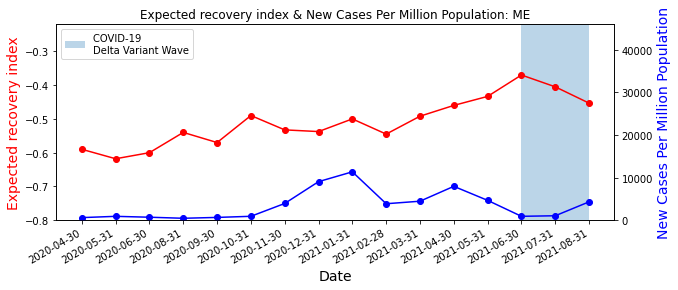

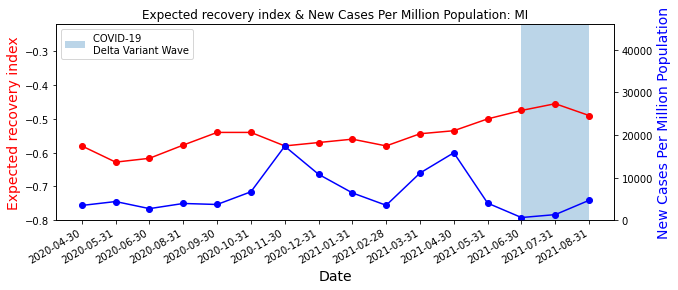

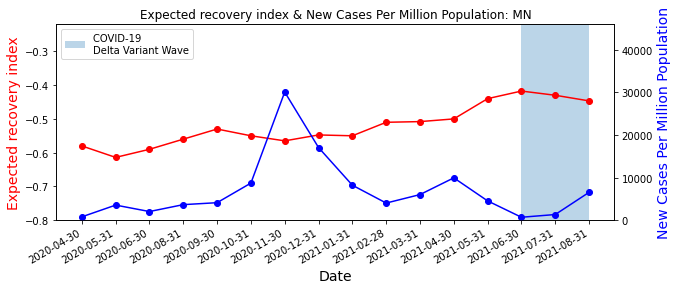

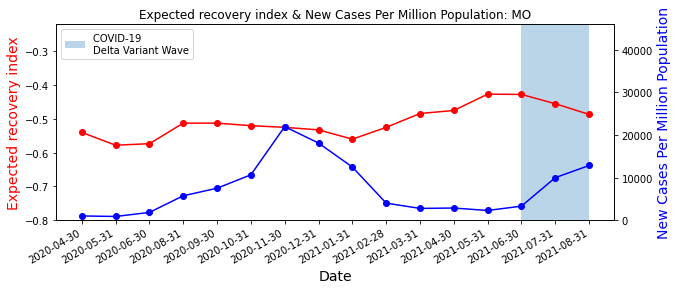

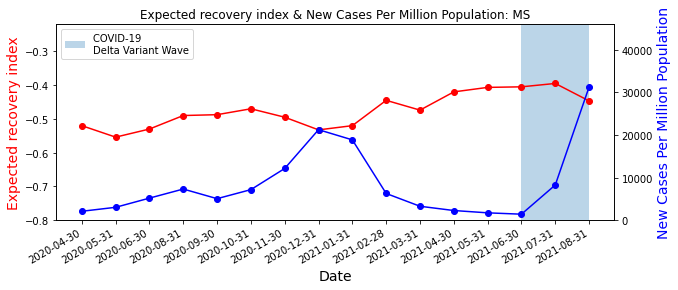

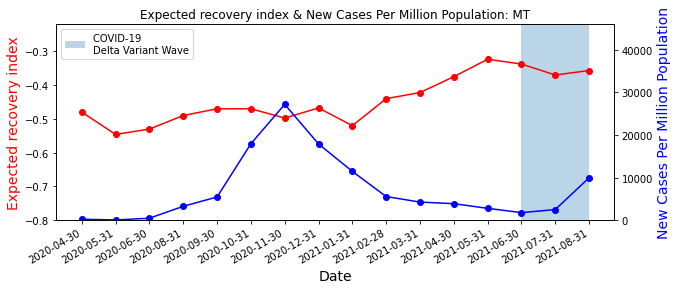

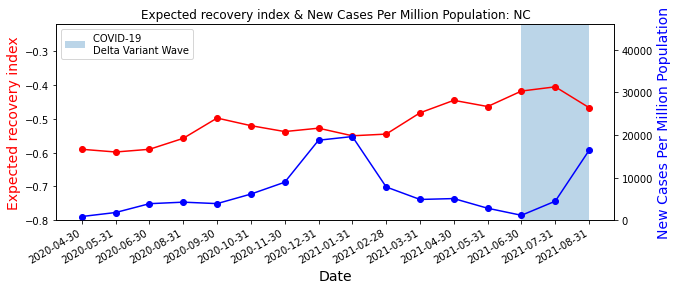

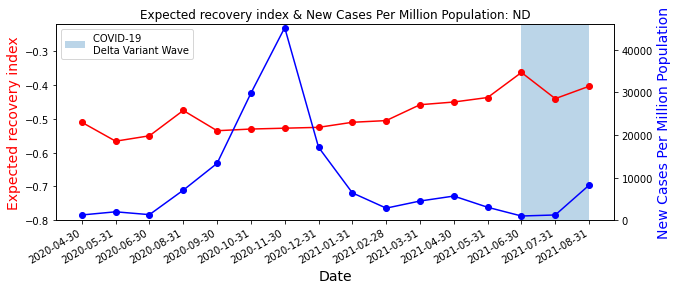

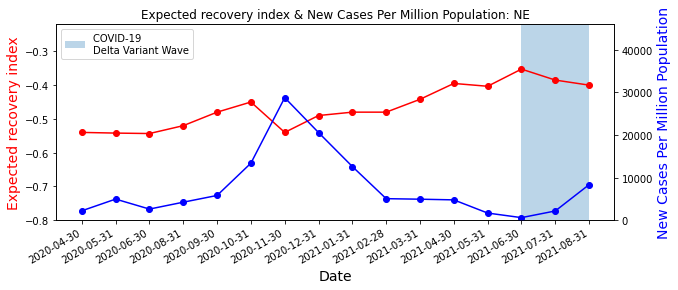

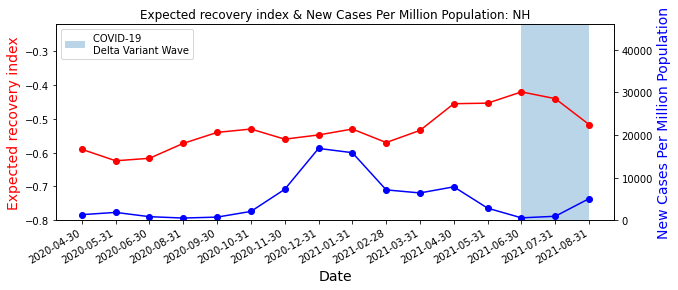

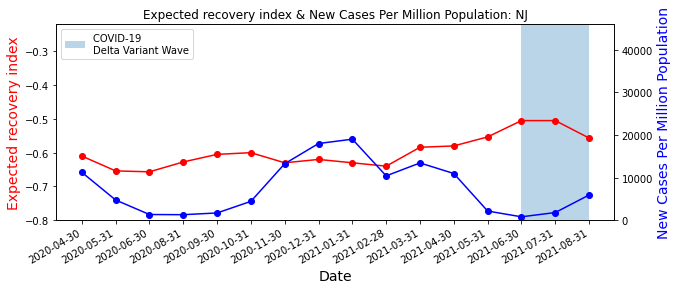

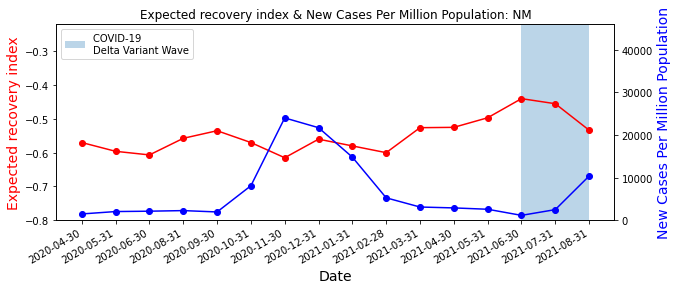

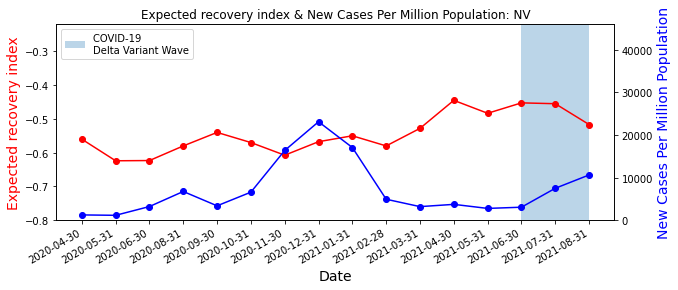

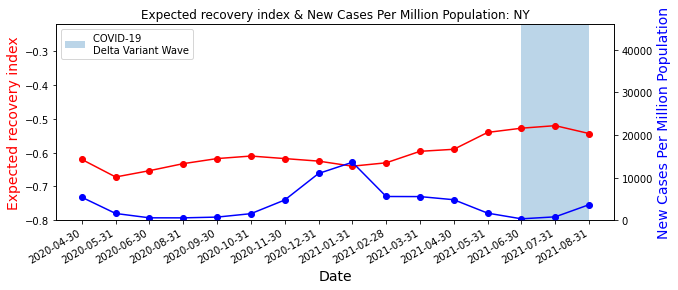

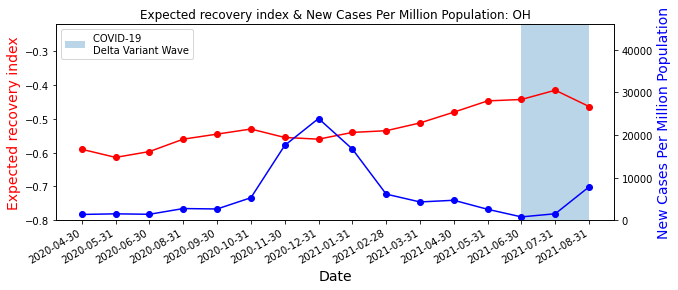

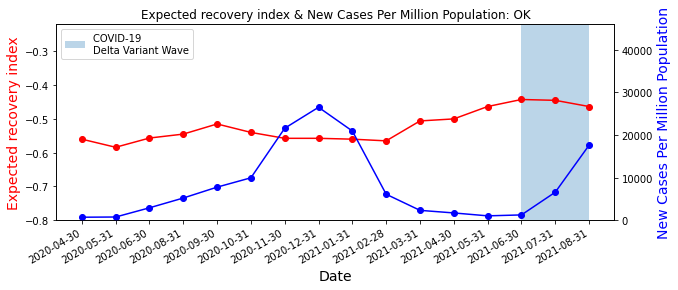

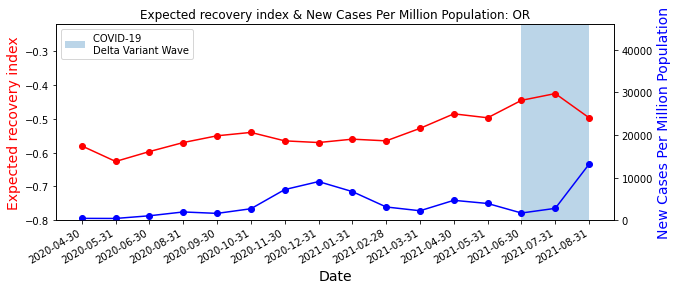

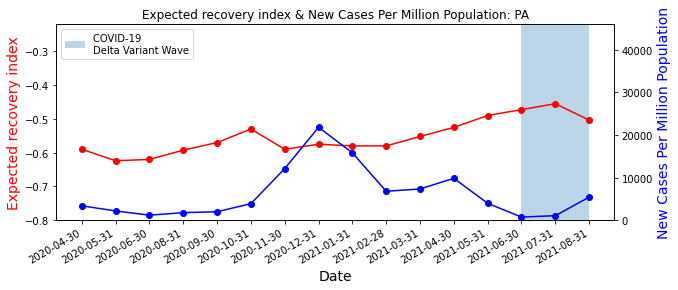

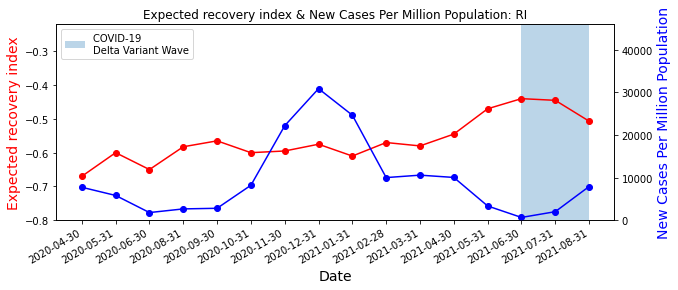

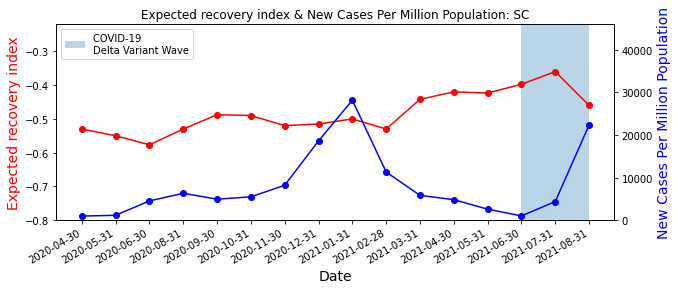

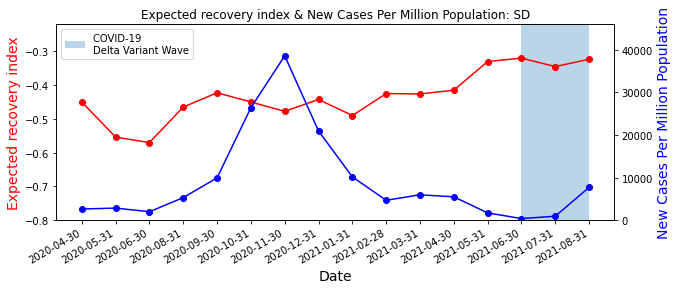

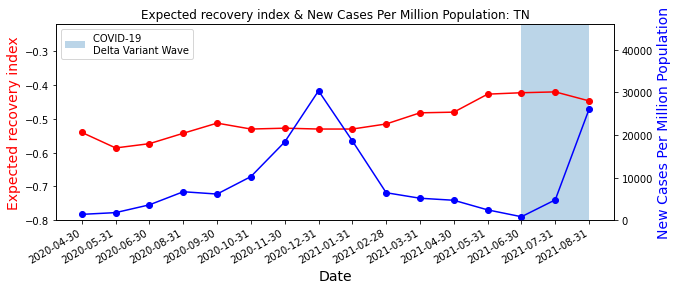

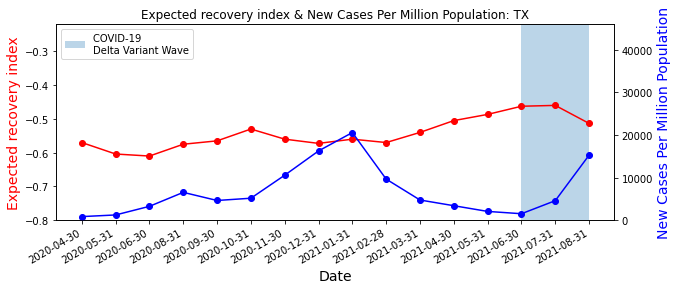

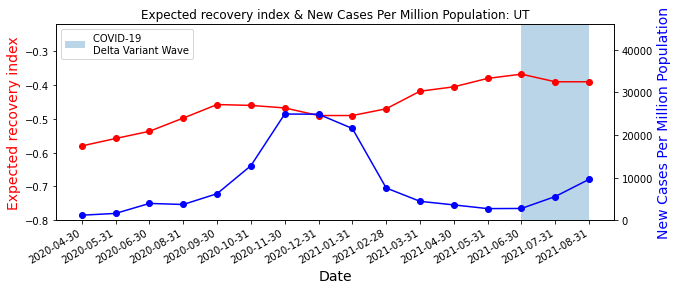

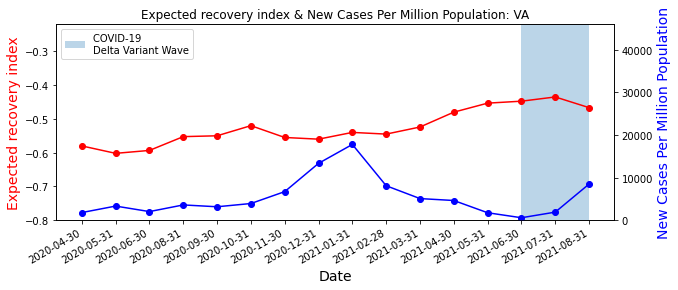

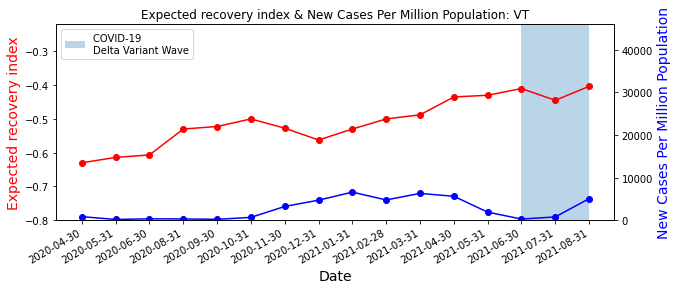

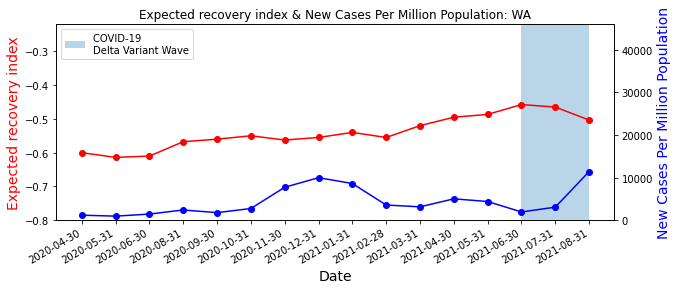

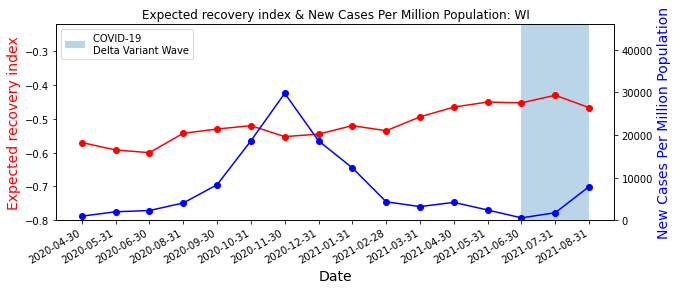

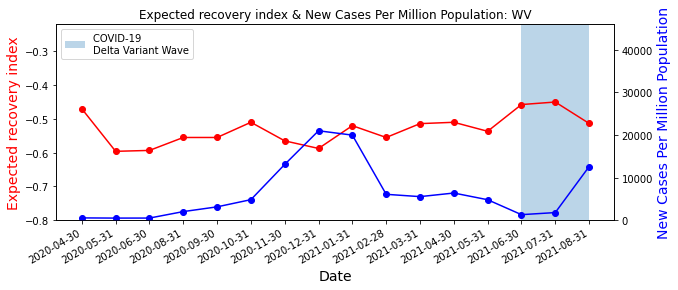

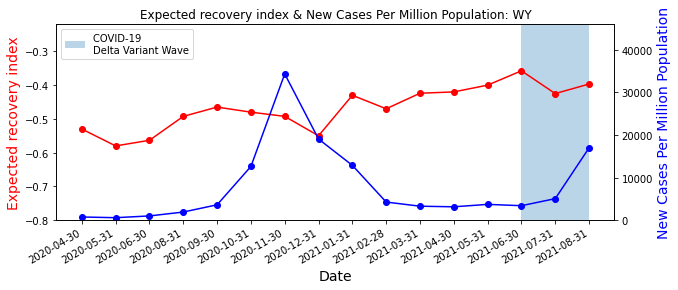

In [179]:
for state  in df.state.unique():
   feature_1 ='expected_recovery'
   feature_2 = 'new_cases_per_1_mill_pop'
   title = 'Expected recovery index & New Cases Per Million Population: '
   df_state = df.loc[df['state']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-0.8,-0.22])
   ax.set_ylabel('Expected recovery index',color="red",fontsize=14)
    
   fmt_half_year = mdates.MonthLocator(interval=3)
   ax.xaxis.set_major_locator(fmt_half_year)

   fmt_month = mdates.MonthLocator()
   ax.xaxis.set_minor_locator(fmt_month)
   ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel('New Cases Per Million Population',color="blue",fontsize=14)
   ax2.set_ylim([0,46000])
   plt.title(title +state)
   rect =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.3)
   ax.legend([rect], ['COVID-19 \nDelta Variant Wave'], loc=2)
   fig.autofmt_xdate()
   plt.show()

In [182]:
df_last = df[df['Date']=='2021-08-31']
df_last.loc[df_last['new_cases_per_1_mill_pop']==df_last.new_cases_per_1_mill_pop.min(),:]

state  ... Additional_Doses_65Plus_Vax_Pct
Date              ...                                
2021-08-31    NY  ...                            0.00

[1 rows x 62 columns]

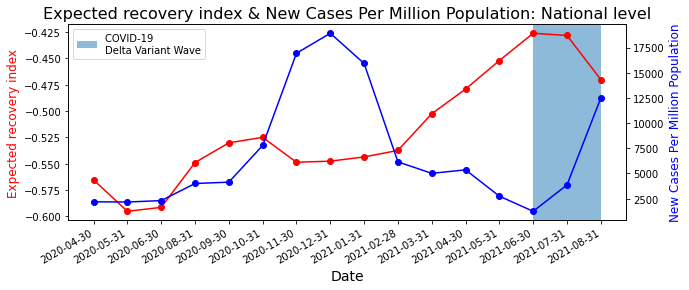

In [172]:
title = 'Expected recovery index & New Cases Per Million Population: '
fig,ax = plt.subplots(figsize =(10,4))
ax.plot(df.groupby(df.index)['expected_recovery'].mean(), color="red", marker="o")
ax.set_xlabel("Date",fontsize=14)
# ax.set_ylim([-0.8,-0.22])
ax.set_ylabel('Expected recovery index',color="red",fontsize=12)

fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2=ax.twinx()
ax2.plot(df.groupby(df.index)['new_cases_per_1_mill_pop'].mean(), color="blue", marker="o")
ax2.set_ylabel('New Cases Per Million Population',color="blue",fontsize=12)
# ax2.set_ylim([20,46000])
plt.title(title + 'National level', fontsize=16)
rect =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.5)
ax.legend([rect], ['COVID-19 \nDelta Variant Wave'], loc=2)
fig.autofmt_xdate()
plt.show()

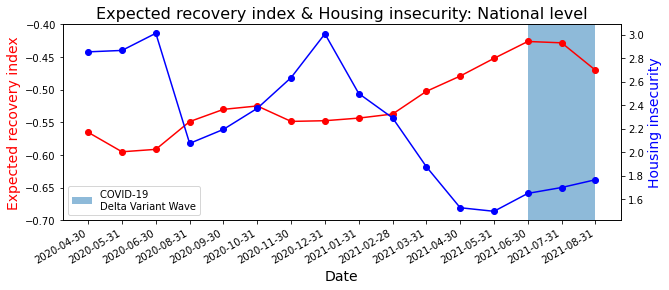

In [170]:
title = 'Expected recovery index & Housing insecurity: '
fig,ax = plt.subplots(figsize =(10,4))
ax.plot(df.groupby(df.index)['expected_recovery'].mean(), color="red", marker="o")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylim([-0.7,-0.4])
ax.set_ylabel('Expected recovery index',color="red",fontsize=14)

fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2=ax.twinx()
ax2.plot(df.groupby(df.index)['housing_insecurity'].mean(), color="blue", marker="o")
ax2.set_ylabel('Housing insecurity',color="blue",fontsize=14)
# ax2.set_ylim([20,46000])
plt.title(title + 'National level',fontsize=16)
rect =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.5)
ax.legend([rect], ['COVID-19 \nDelta Variant Wave'], loc=3)
fig.autofmt_xdate()
plt.show()

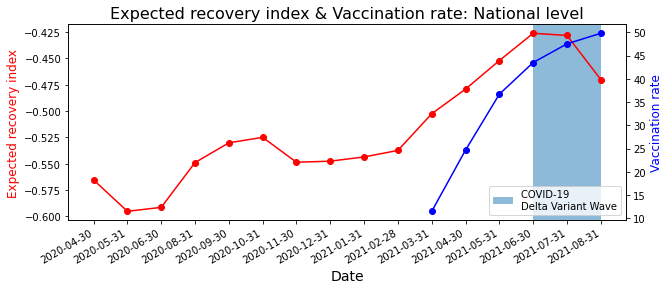

In [159]:
feature_1 ='expected_recovery'
feature_2 = 'Series_Complete_Pop_Pct'
title = 'Expected recovery index & Vaccination rate: '
fig,ax = plt.subplots(figsize =(10,4))
ax.plot(df.groupby(df.index)['expected_recovery'].mean(), color="red", marker="o")
ax.set_xlabel("Date",fontsize=14)
# ax.set_ylim([-0.8,-0.22])
ax.set_ylabel('Expected recovery index',color="red",fontsize=12)

fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2=ax.twinx()
ax2.plot(df.groupby(df.index)['Series_Complete_Pop_Pct'].mean(), color="blue", marker="o")
ax2.set_ylabel('Vaccination rate',color="blue",fontsize=12)
# ax2.set_ylim([6,60])
plt.title(title + 'National level',fontsize=16)
rect =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.5)
ax.legend([rect], ['COVID-19 \nDelta Variant Wave'], loc=4)
fig.autofmt_xdate()
plt.show()

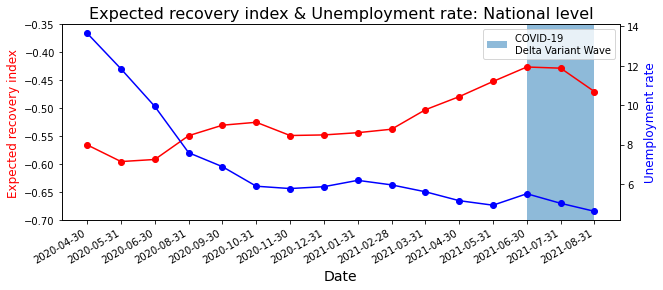

In [160]:
feature_1 ='expected_recovery'
feature_2 = 'unemployment_rate'
title = 'Expected recovery index & Unemployment rate: '
fig,ax = plt.subplots(figsize =(10,4))
line_1 =ax.plot(df.groupby(df.index)['expected_recovery'].mean(), color="red", marker="o")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel('Expected recovery index',color="red",fontsize=12)
ax.set_ylim([-0.7, -0.35])

fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2=ax.twinx()
line_2 = ax2.plot(df.groupby(df.index)['unemployment_rate'].mean(), color="blue", marker="o")
ax2.set_ylabel('Unemployment rate',color="blue",fontsize=12)
plt.title(title + 'National level',fontsize=16)
rect =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.5)
ax.legend([rect], ['COVID-19 \nDelta Variant Wave'], loc=1)
fig.autofmt_xdate()
plt.show()

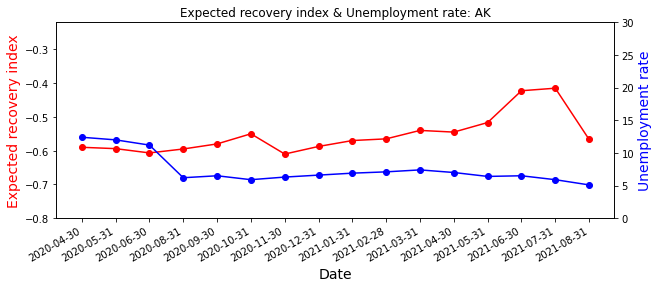

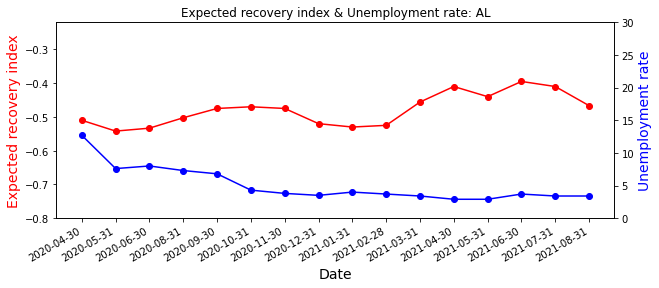

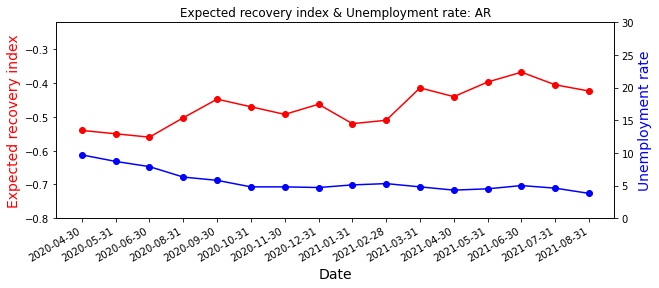

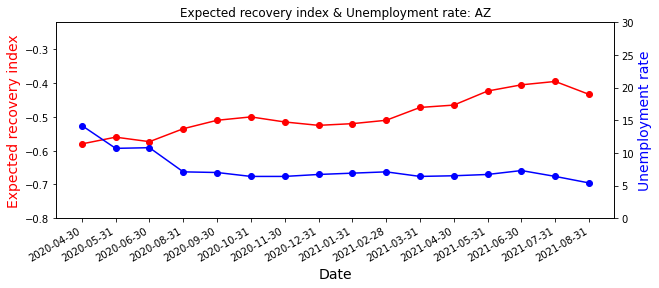

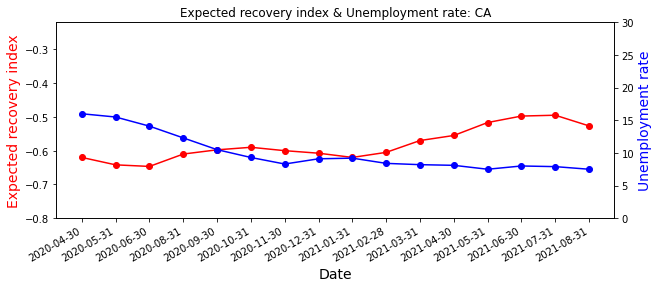

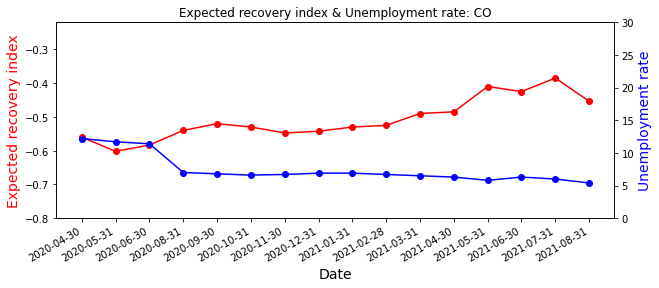

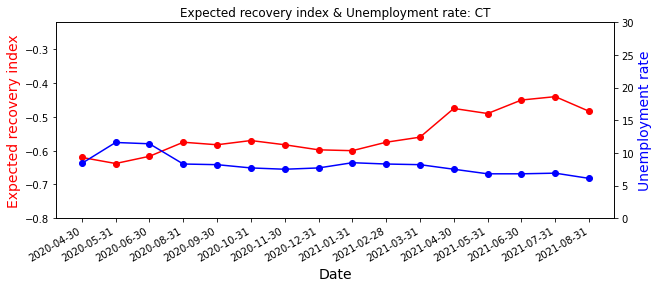

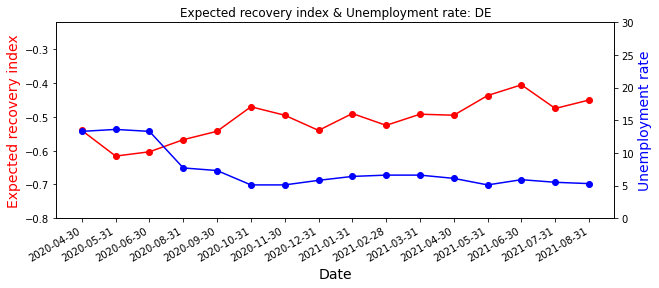

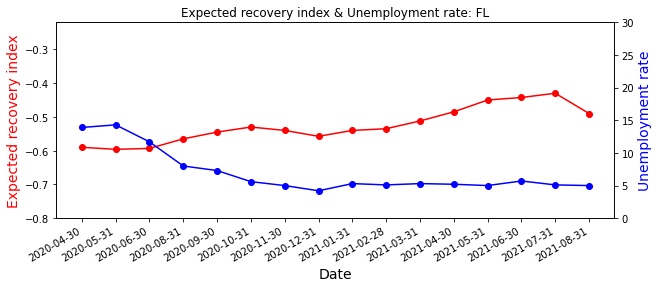

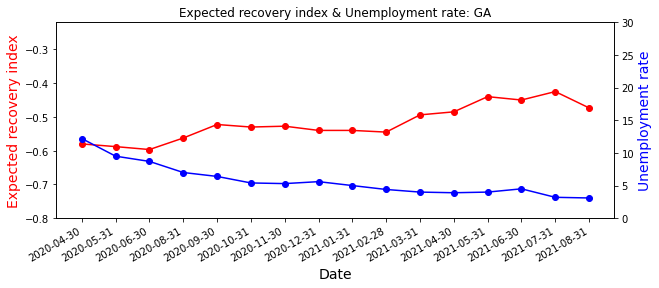

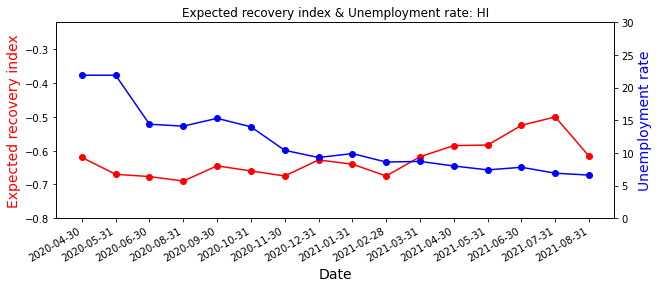

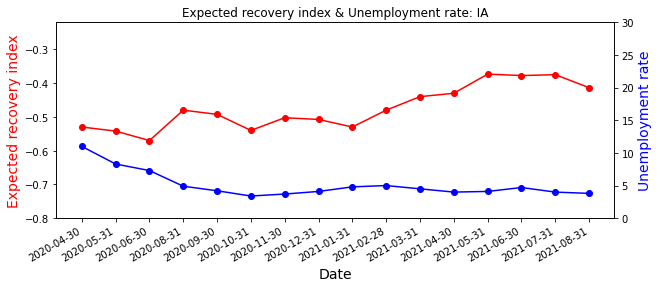

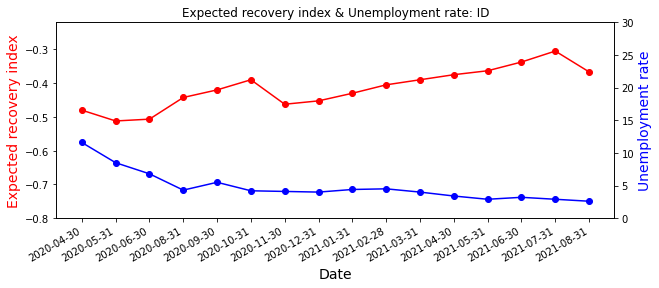

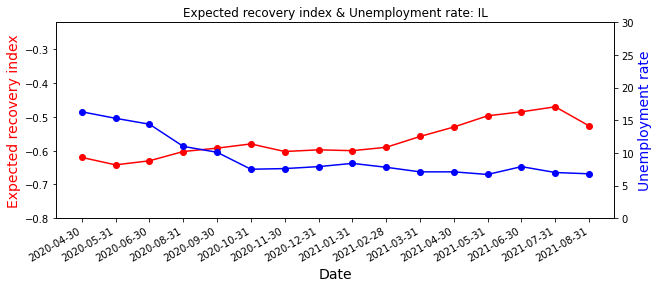

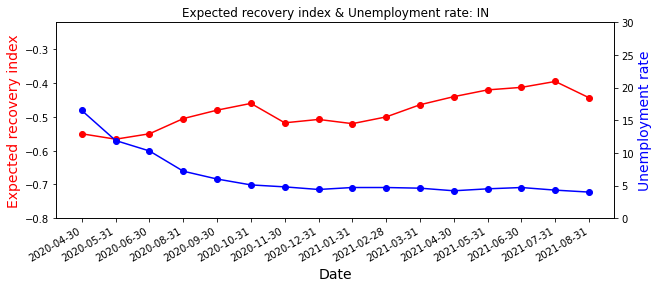

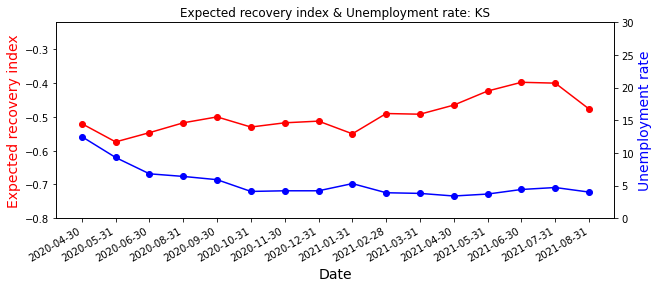

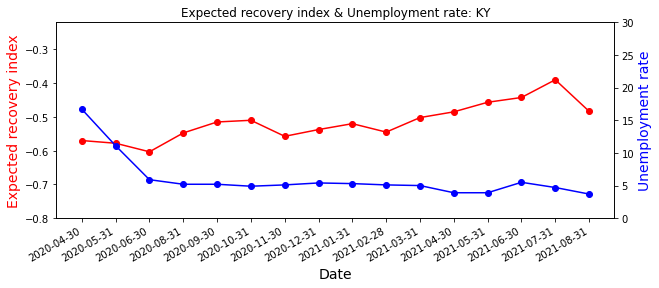

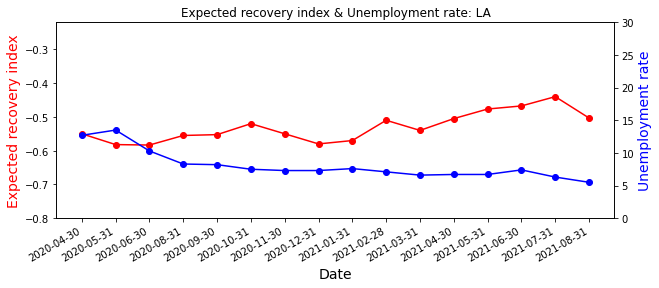

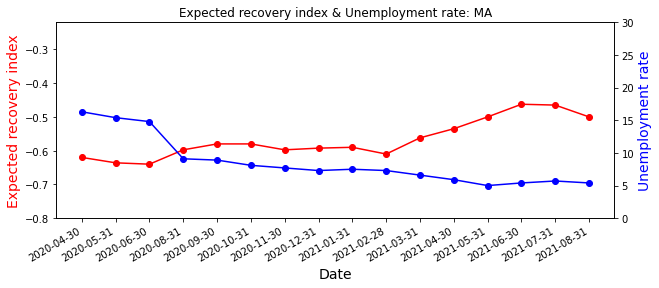

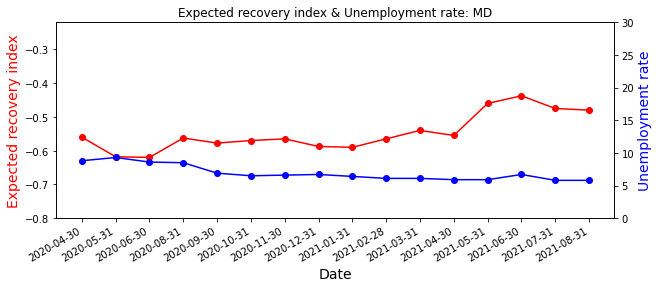

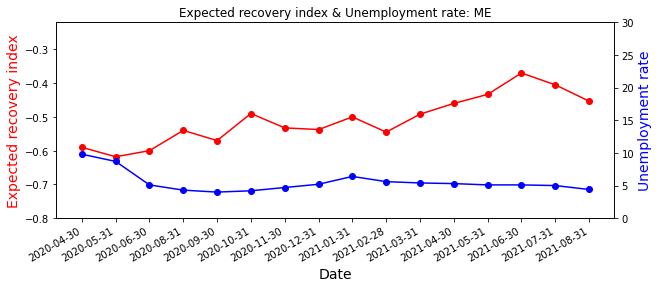

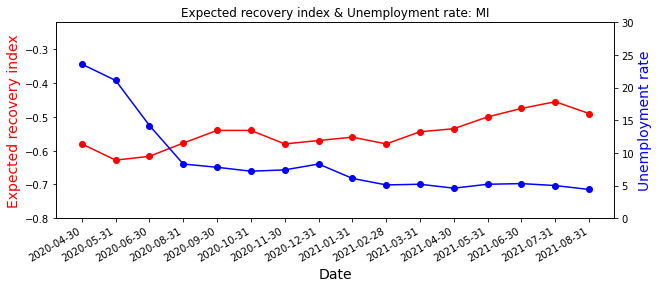

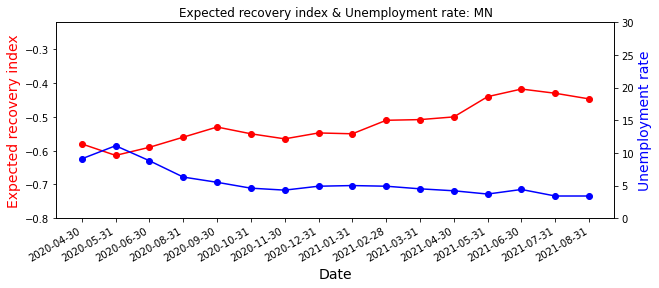

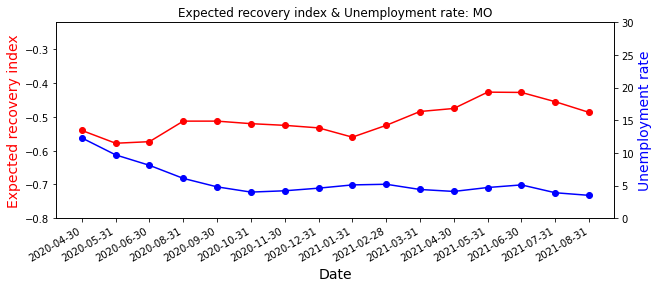

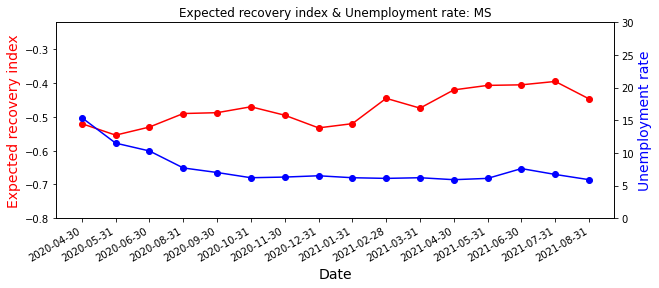

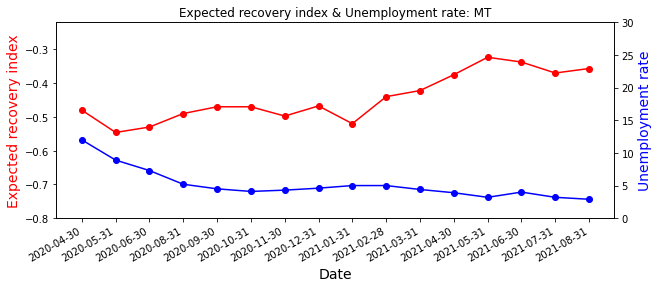

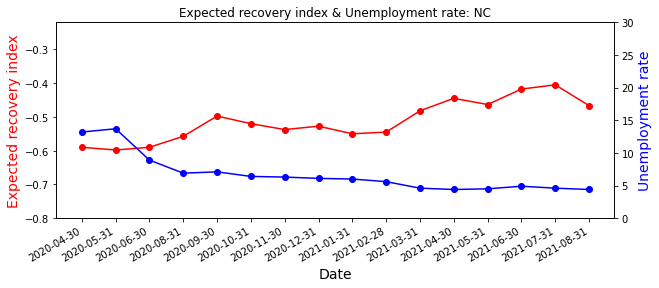

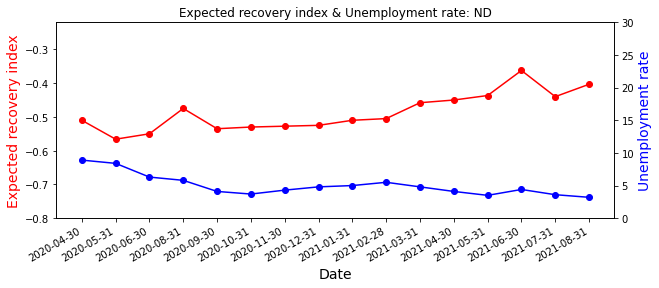

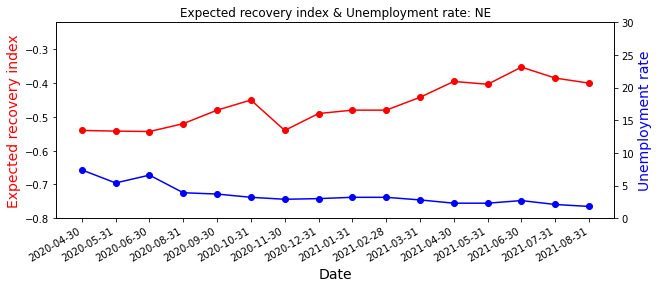

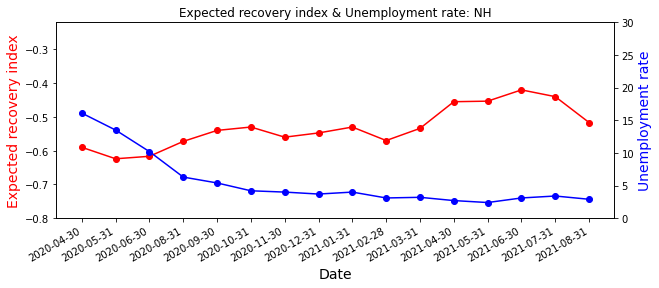

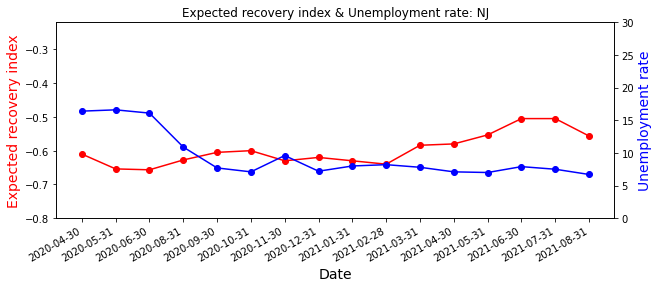

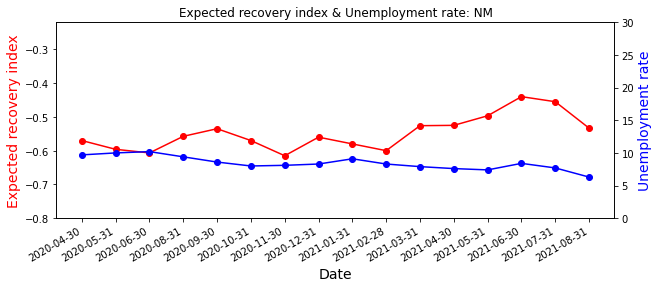

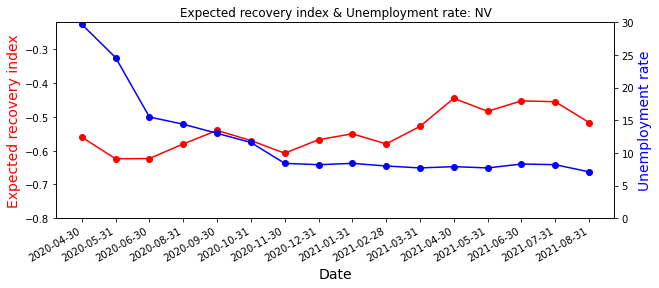

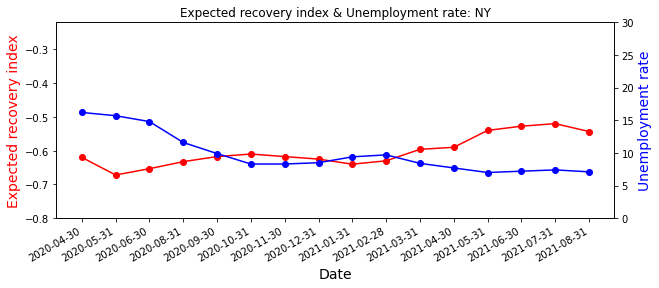

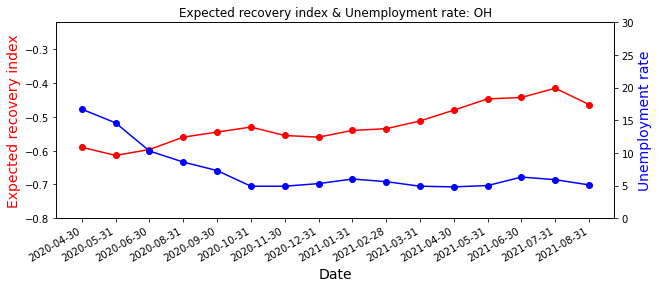

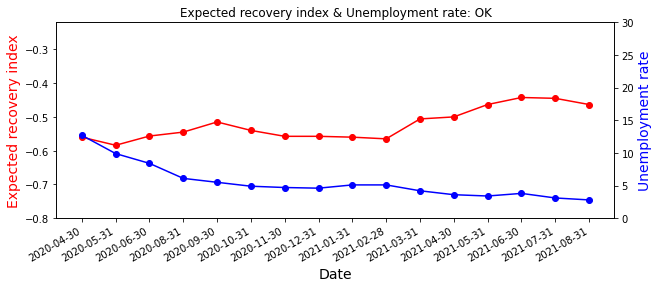

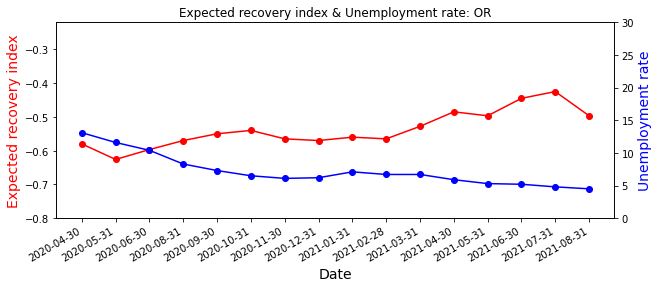

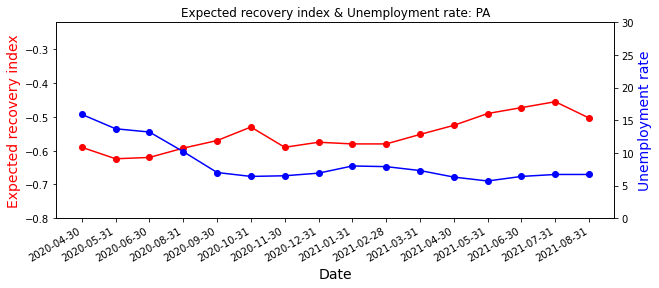

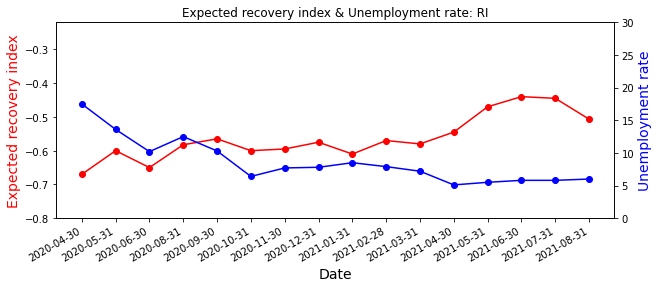

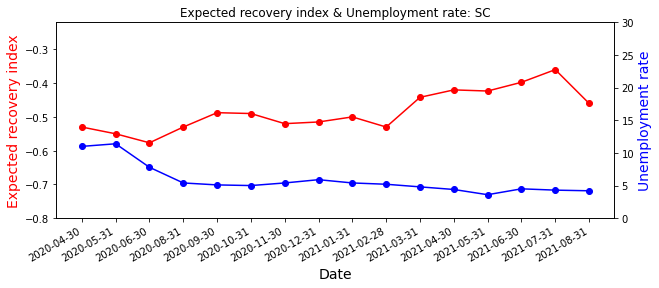

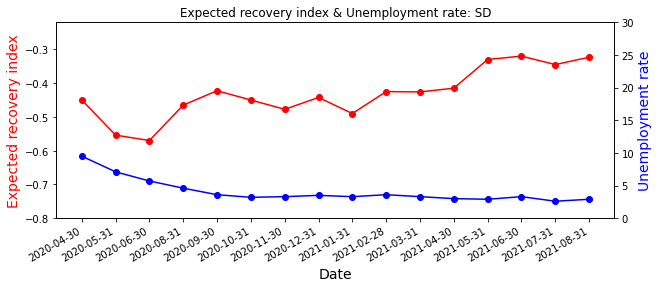

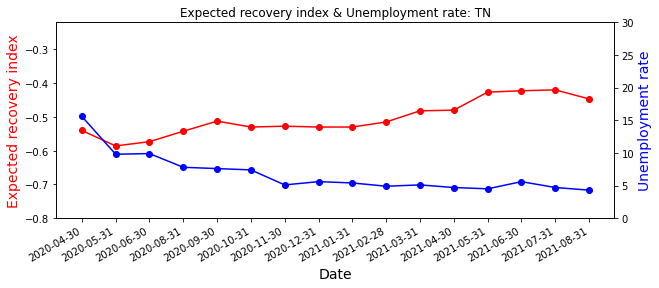

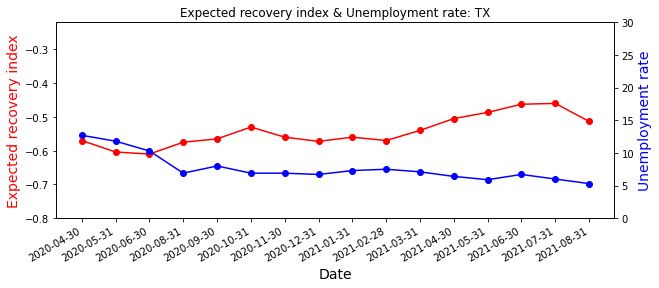

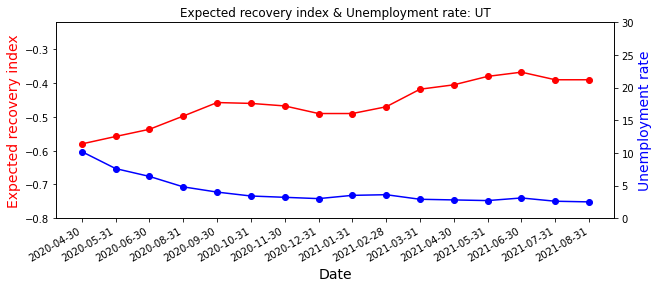

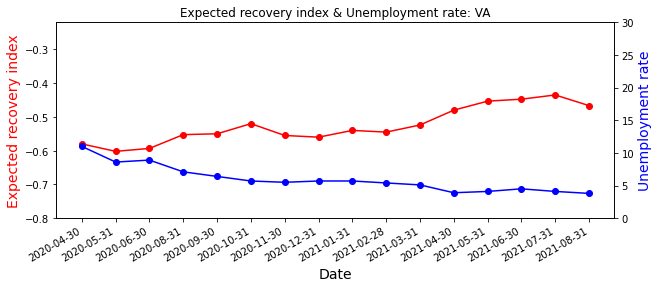

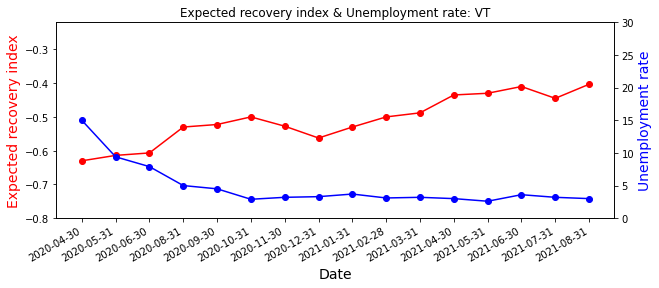

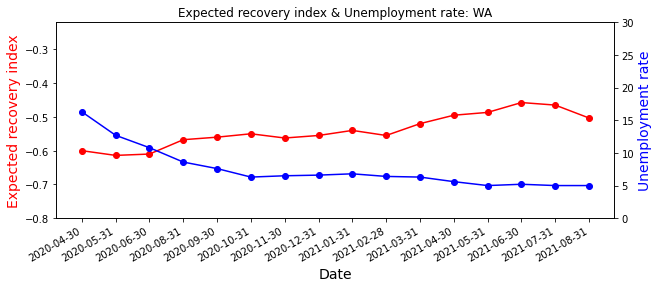

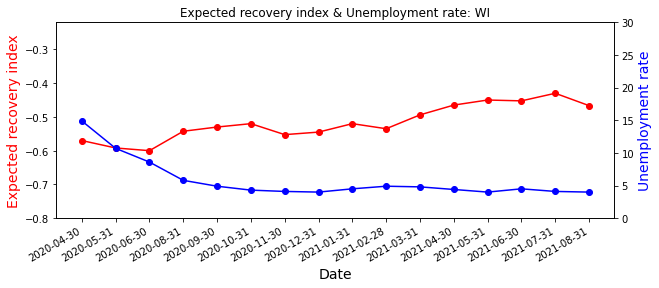

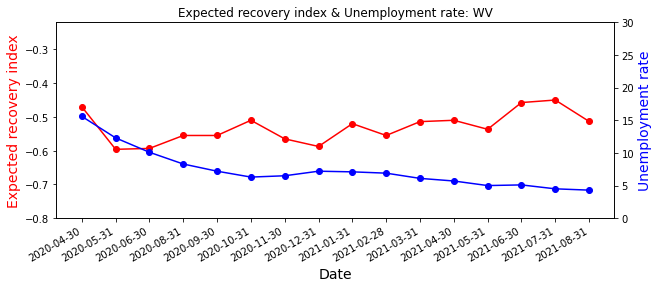

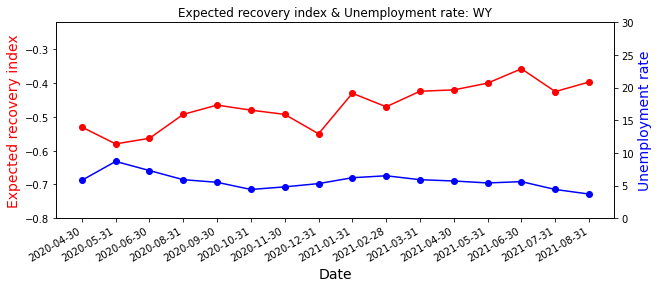

In [98]:
for state  in df.state.unique():
   feature_1 ='expected_recovery'
   feature_2 = 'unemployment_rate'
   title = 'Expected recovery index & Unemployment rate: '
   df_state = df.loc[df['state']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-0.8,-0.22])
   ax.set_ylabel('Expected recovery index',color="red",fontsize=14)
    
   fmt_half_year = mdates.MonthLocator(interval=3)
   ax.xaxis.set_major_locator(fmt_half_year)

   fmt_month = mdates.MonthLocator()
   ax.xaxis.set_minor_locator(fmt_month)
   ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel('Unemployment rate',color="blue",fontsize=14)
   ax2.set_ylim([0,30])
   plt.title(title +state)
  
   fig.autofmt_xdate()
   plt.show()

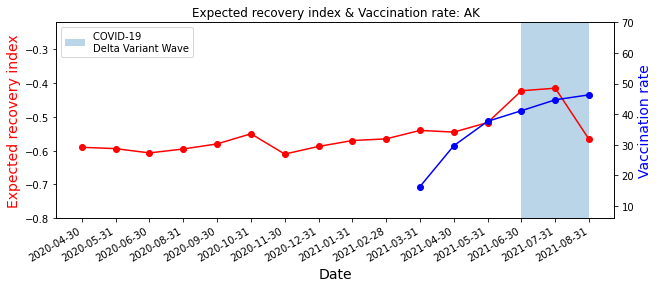

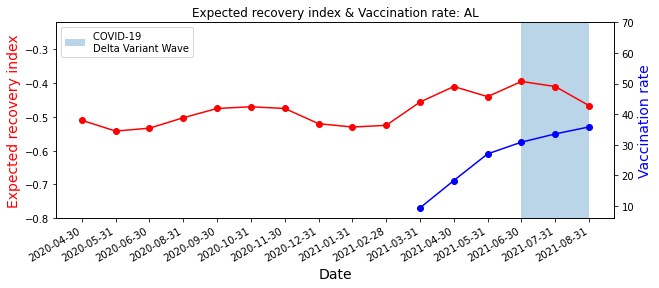

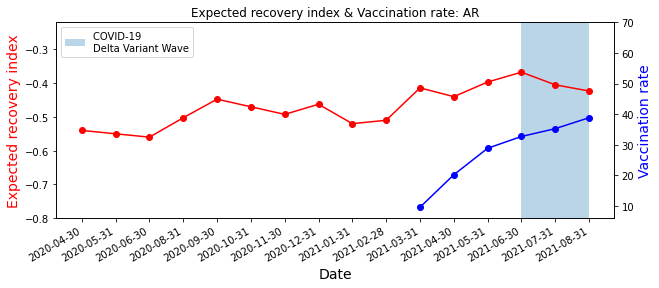

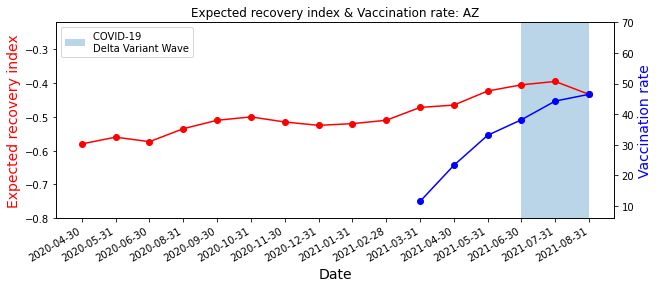

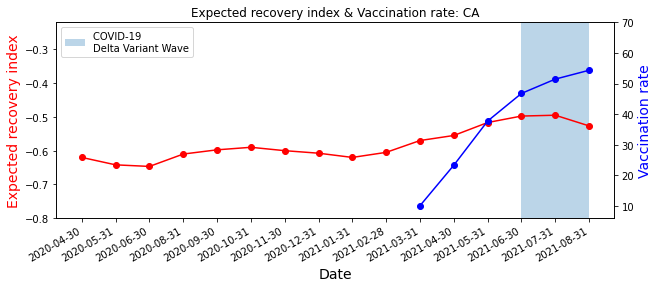

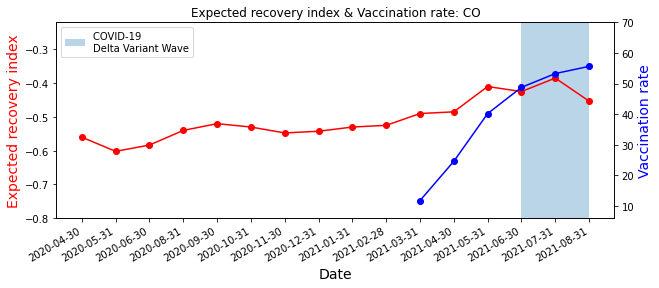

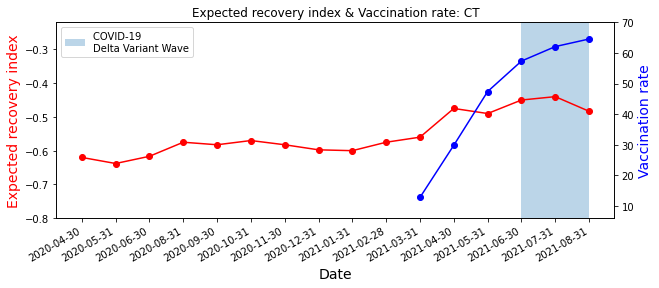

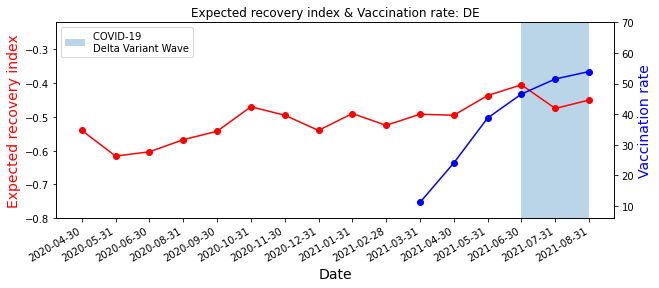

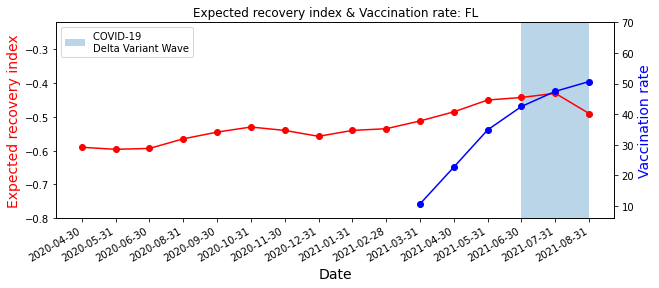

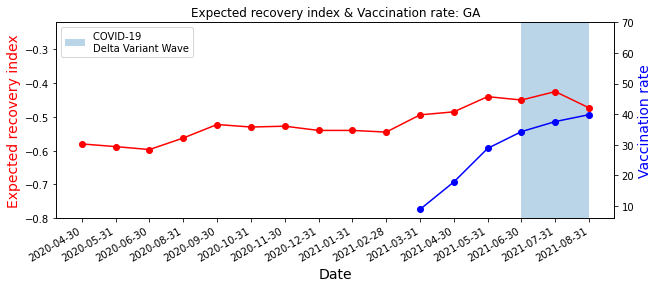

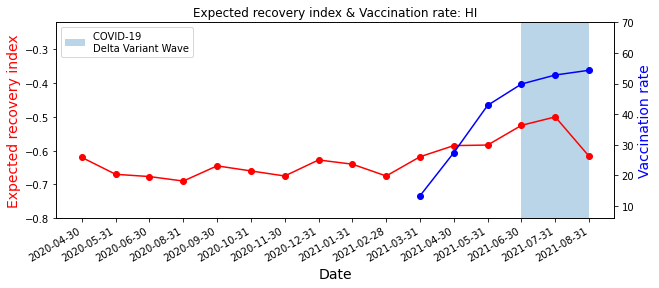

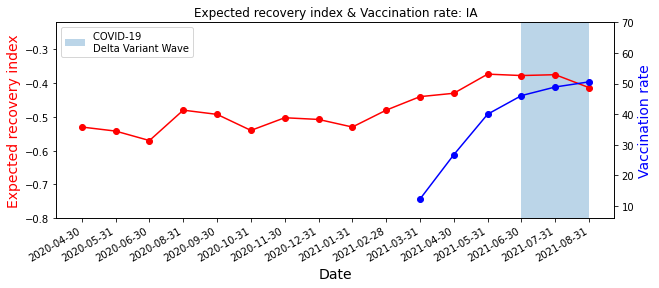

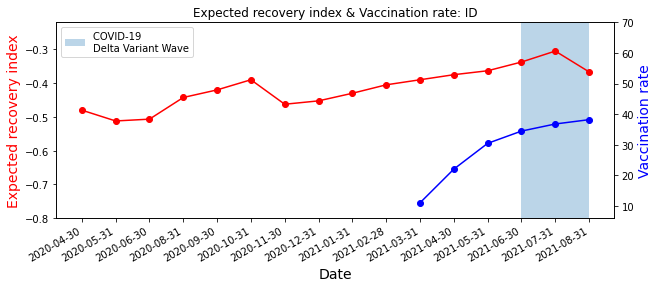

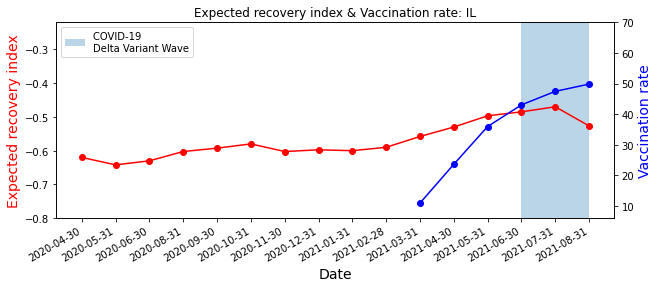

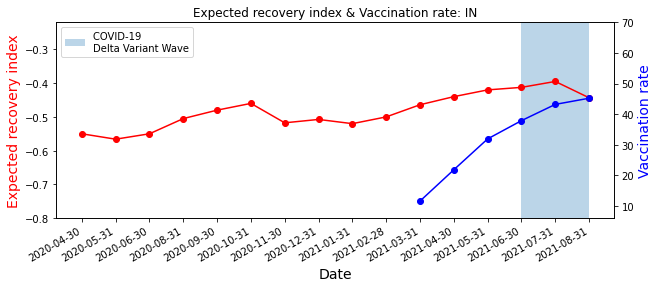

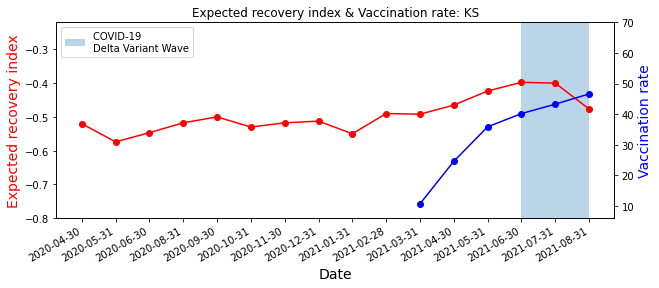

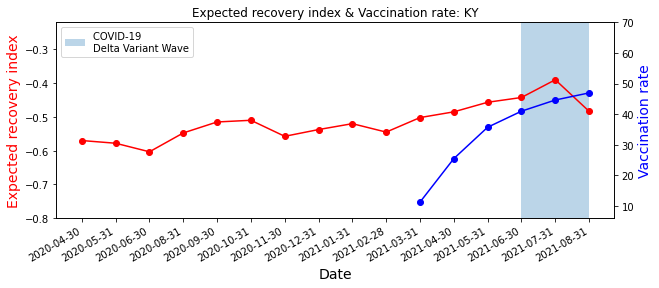

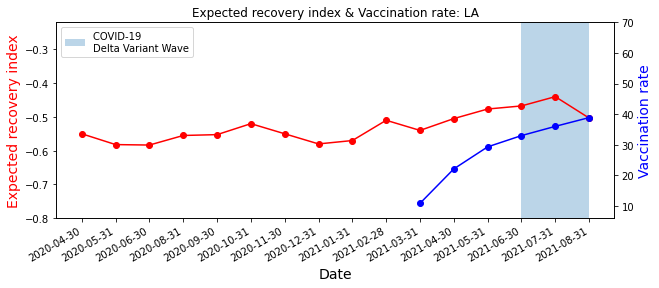

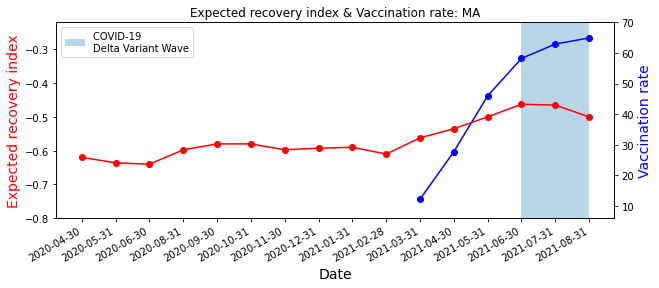

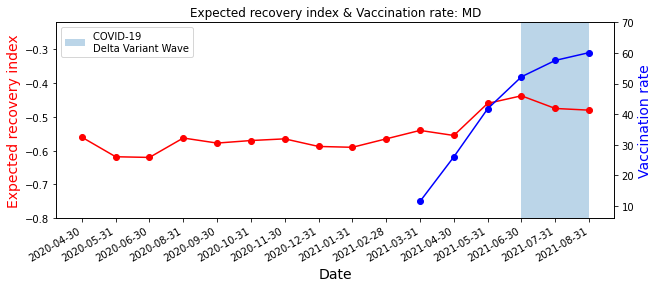

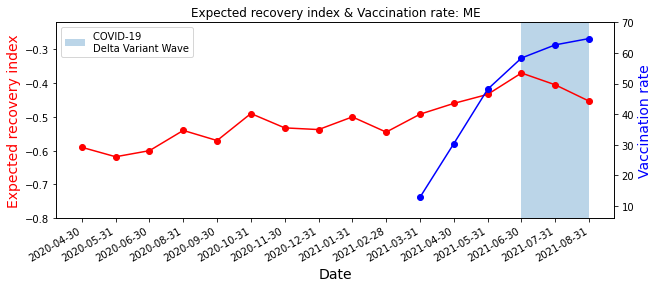

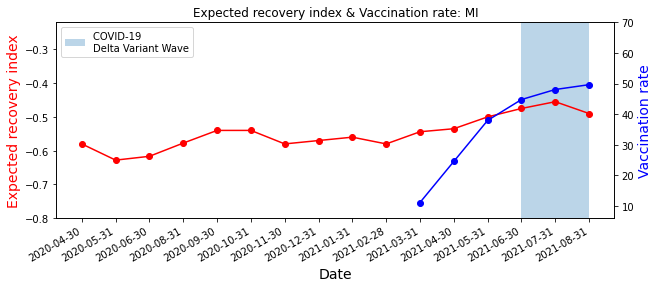

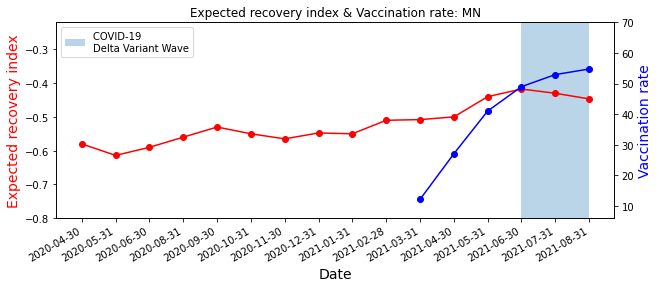

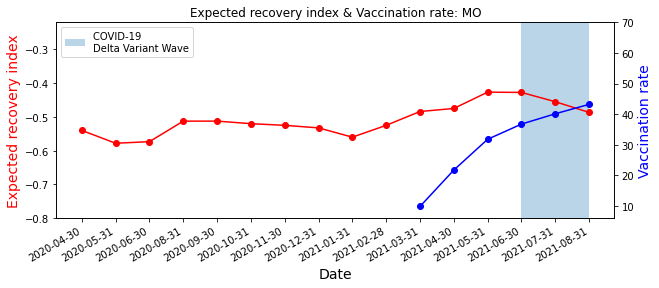

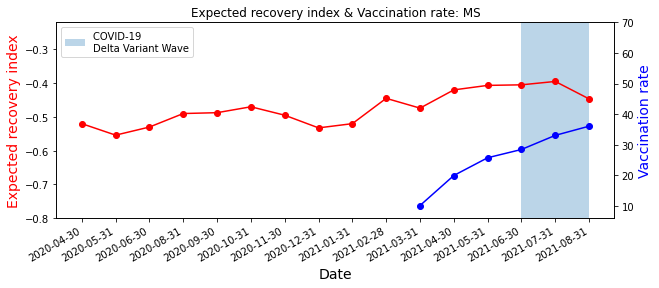

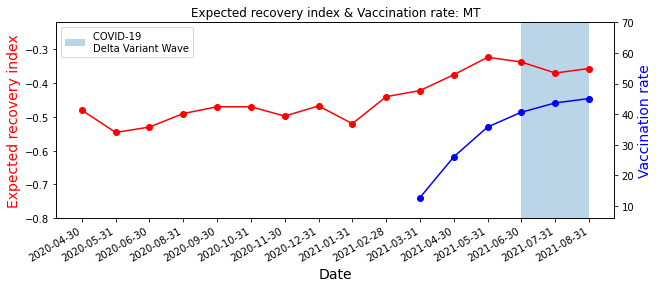

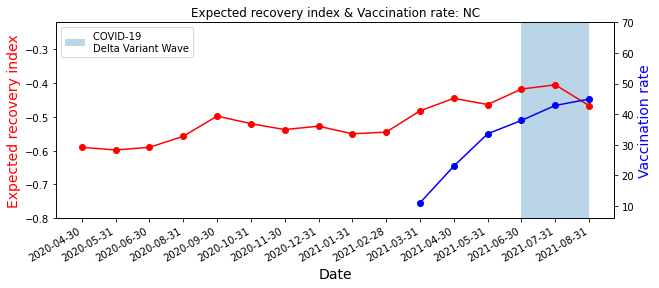

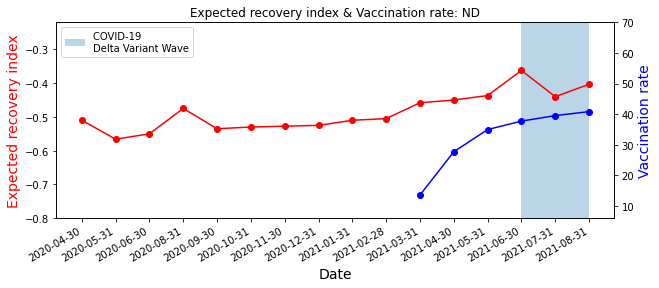

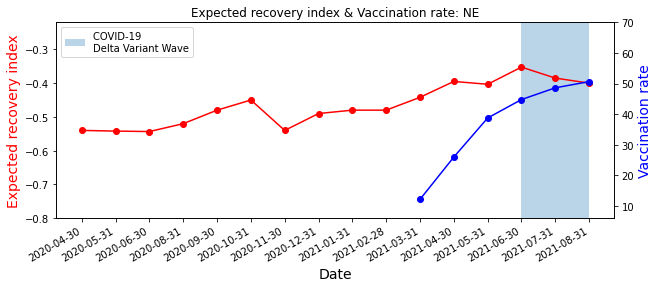

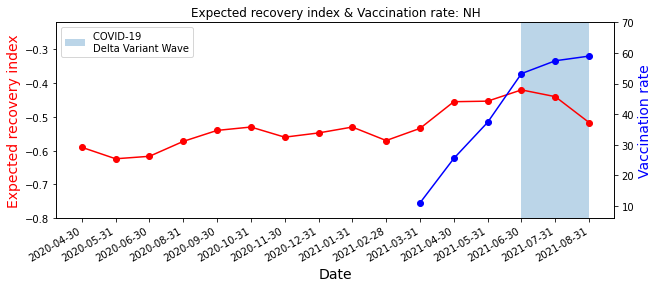

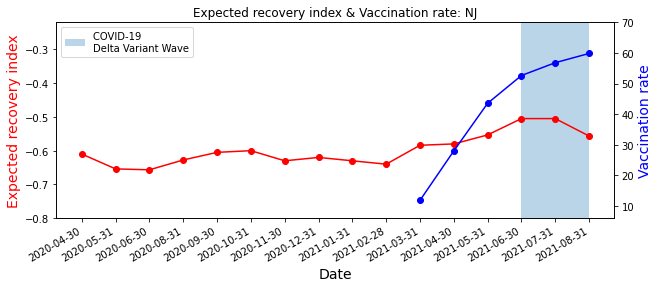

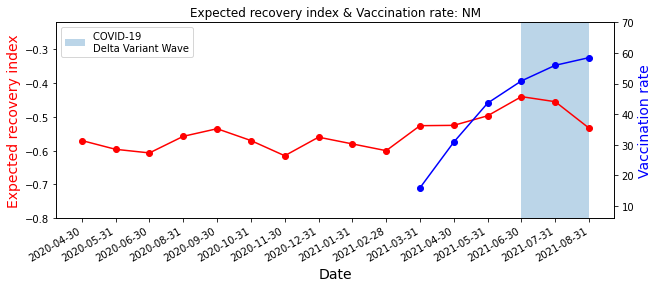

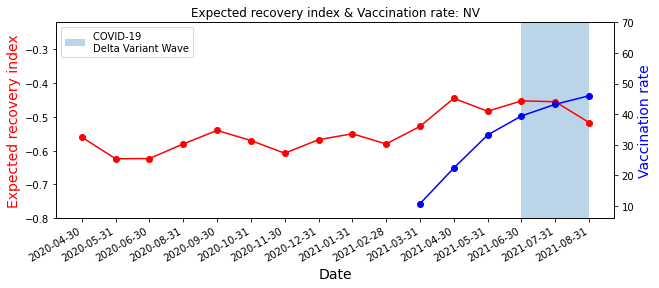

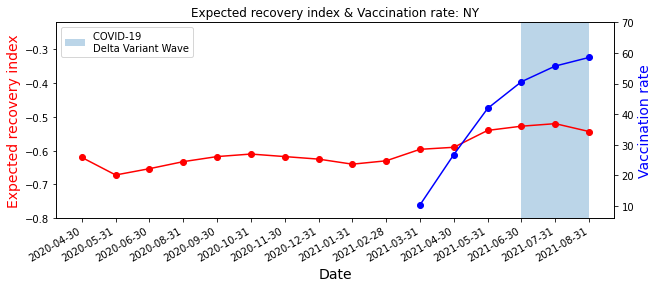

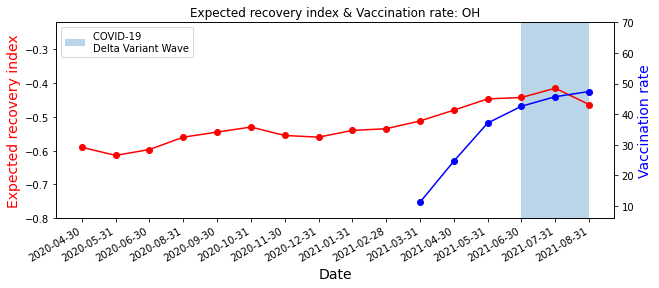

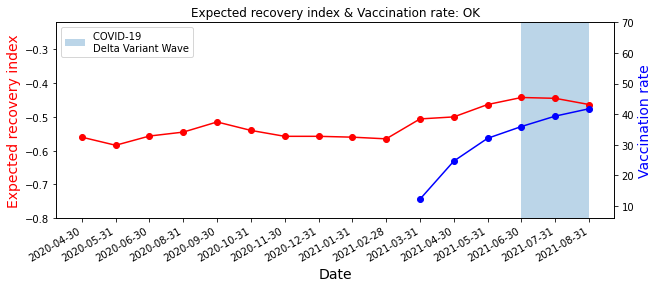

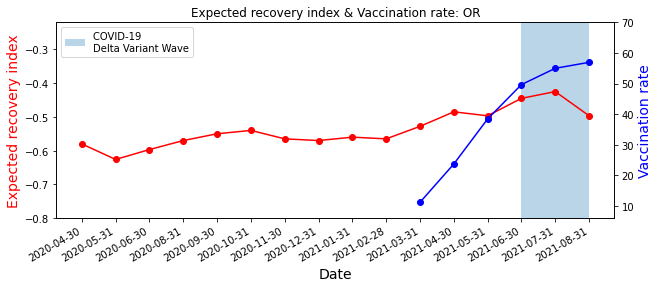

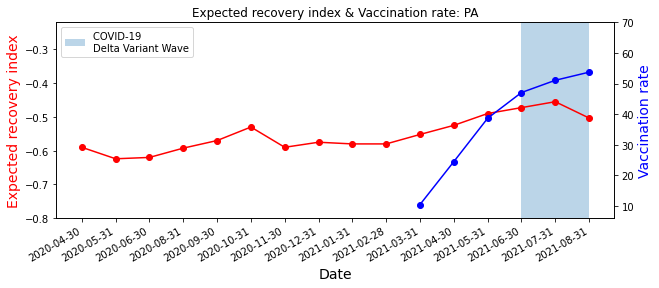

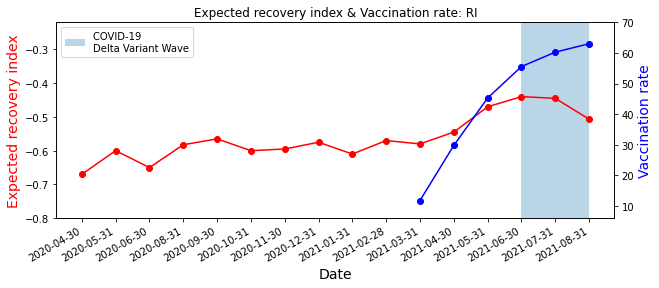

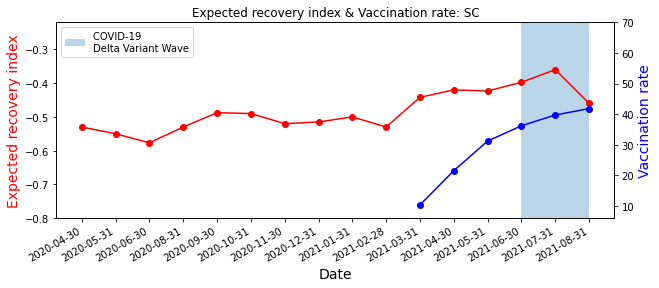

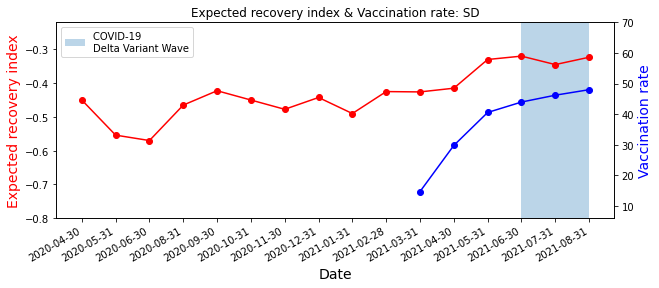

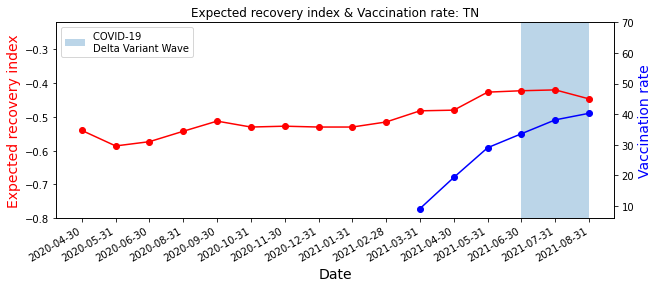

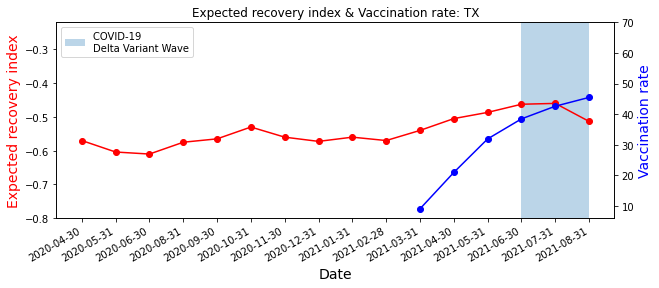

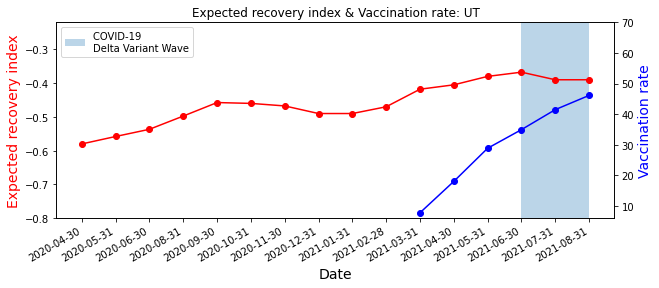

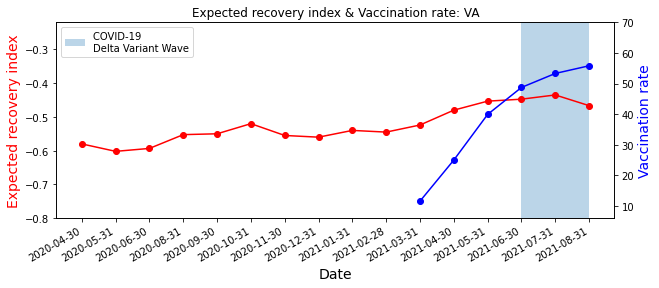

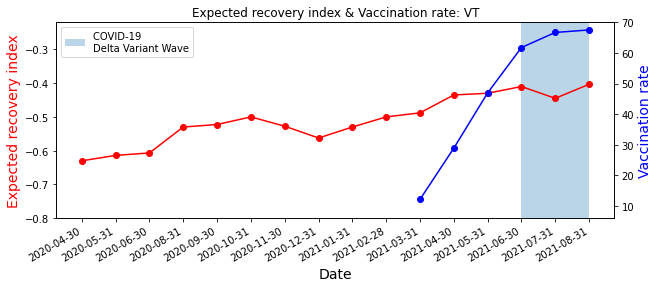

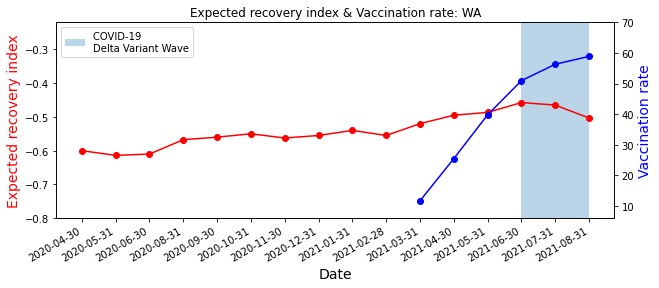

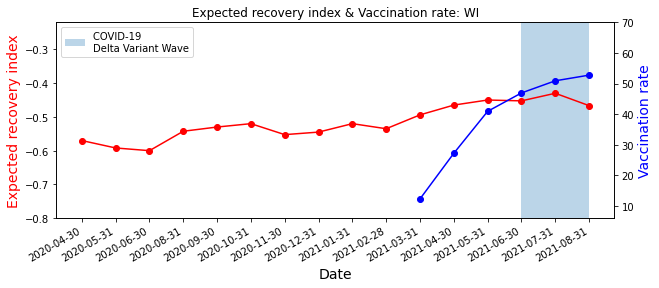

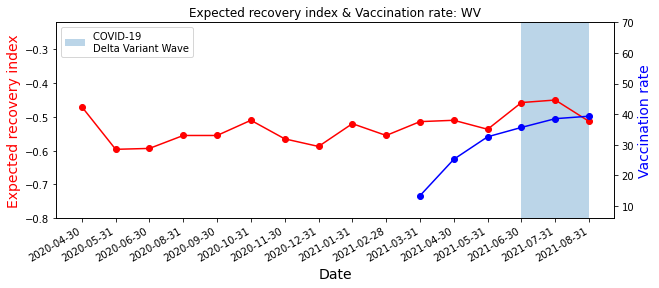

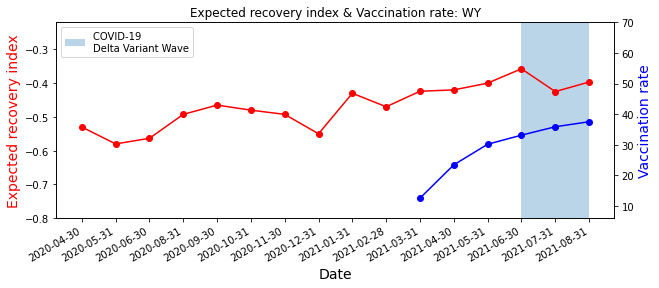

In [183]:
for state  in df.state.unique():
   feature_1 ='expected_recovery'
   feature_2 = 'Series_Complete_Pop_Pct'
   title = 'Expected recovery index & Vaccination rate: '
   df_state = df.loc[df['state']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-0.8,-0.22])
   ax.set_ylabel('Expected recovery index',color="red",fontsize=14)
    
   fmt_half_year = mdates.MonthLocator(interval=3)
   ax.xaxis.set_major_locator(fmt_half_year)

   fmt_month = mdates.MonthLocator()
   ax.xaxis.set_minor_locator(fmt_month)
   ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel('Vaccination rate',color="blue",fontsize=14)
   ax2.set_ylim([6,70])
   plt.title(title +state)
   rect =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.3)
   ax.legend([rect], ['COVID-19 \nDelta Variant Wave'], loc=2)
   fig.autofmt_xdate()
   plt.show()

In [7]:
df['Series_Complete_Pop_Pct'].replace(0, np.nan, inplace=True)

(-1.0, 0.0)

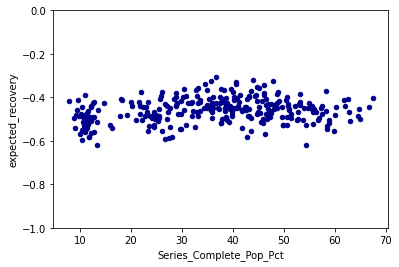

In [81]:
ax1 = df.plot.scatter(x='Series_Complete_Pop_Pct',
                      y='expected_recovery',
                      c='DarkBlue')
ax1.set_ylim(-1,0)

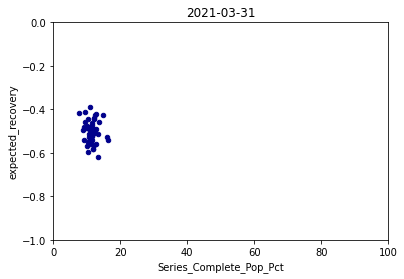

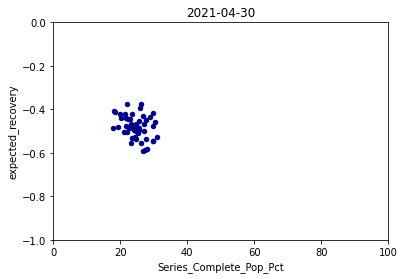

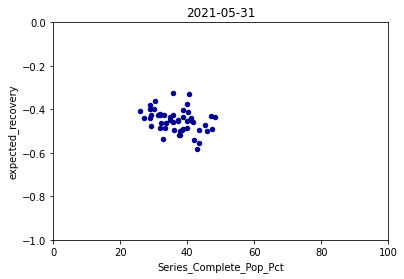

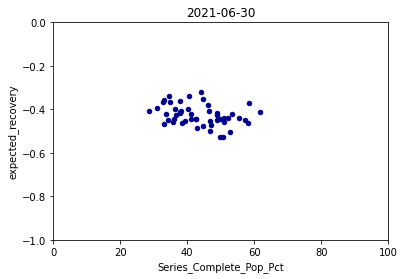

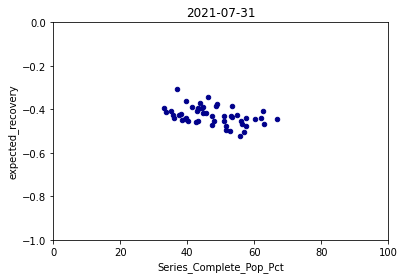

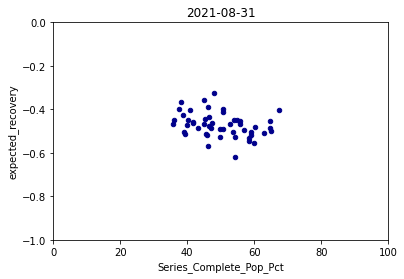

In [93]:
for date in df.Date.unique():
  df_date = df.loc[df['Date']==date,:]
  if len(df_date.Series_Complete_Pop_Pct.unique())!=1:
    df_date.plot.scatter(x='Series_Complete_Pop_Pct',
                        y='expected_recovery',
                        c='DarkBlue')
    plt.ylim(-1,0)
    plt.xlim(0,100)
    plt.title(date)
    plt.show()

In [ ]:
df[['Series_Complete_Pop_Pct','expected_recovery']].plot(subplots=True)

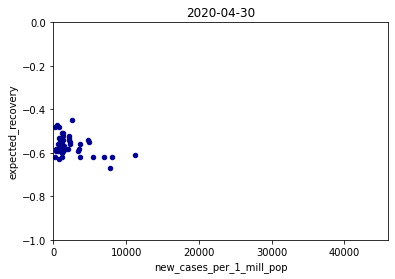

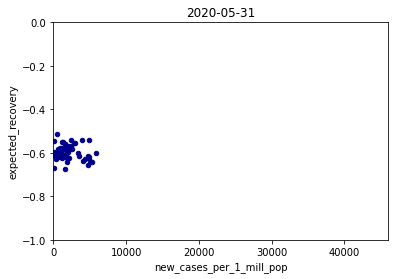

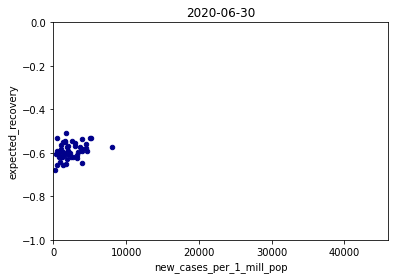

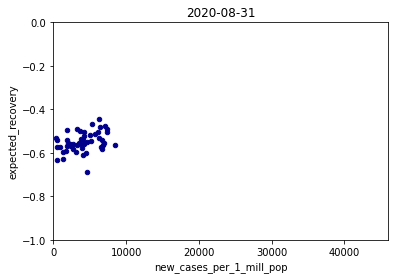

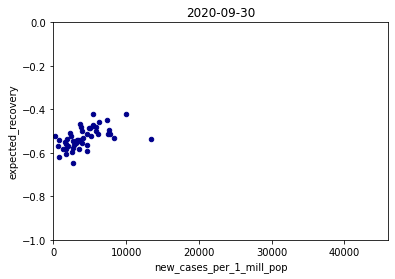

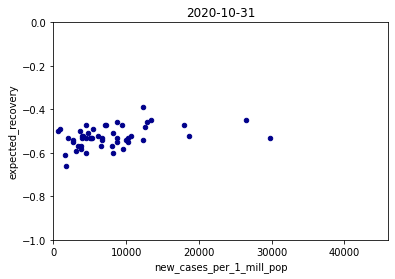

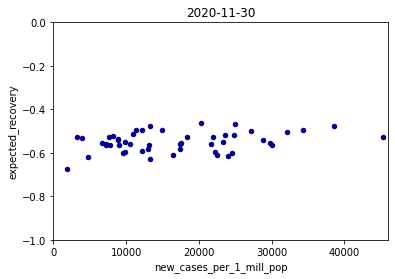

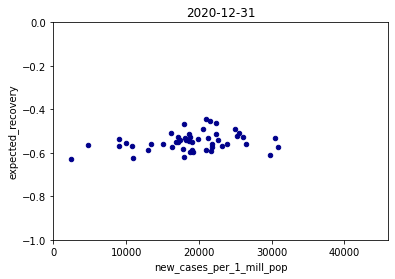

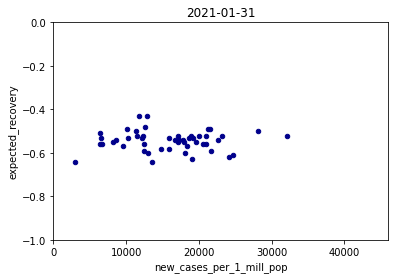

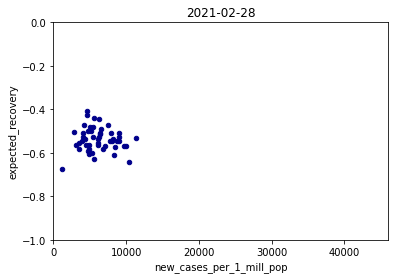

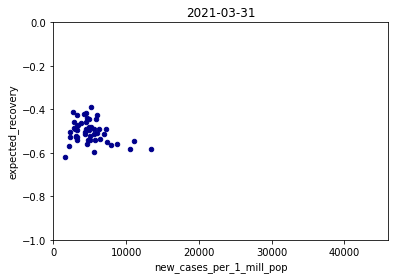

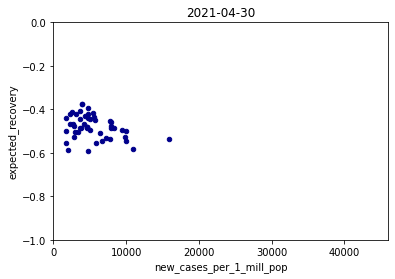

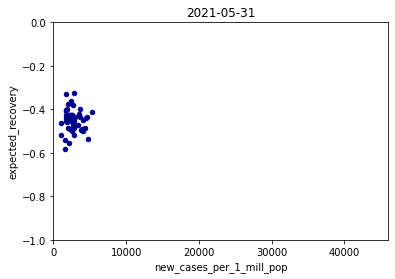

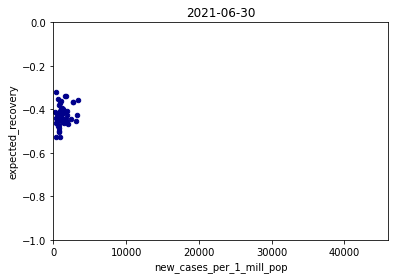

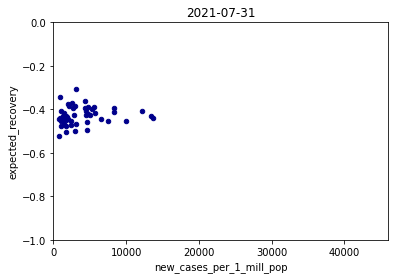

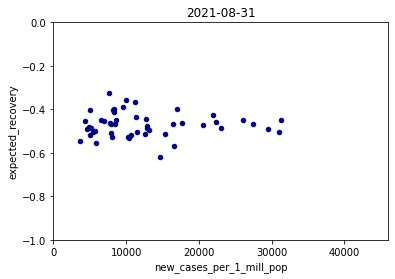

In [86]:
for date in df.Date.unique():
  df_date = df.loc[df['Date']==date,:]
  # if len(df_date.new_cases_per_1_mill_pop.unique())!=1:
  df_date.plot.scatter(x='new_cases_per_1_mill_pop',
                      y='expected_recovery',
                      c='DarkBlue')
  plt.ylim(-1,0)
  plt.xlim(0,46000)
  plt.title(date)
  plt.show()

In [239]:
df_MS_NY = df.loc[df['state'].isin(['MS','NY']),['expected_recovery','overall_sentiment','state']]
date_pred = ['2021-09-30', '2021-10-31','2021-11-30']
MS_OSI_Predictions = [-0.396366, -0.398442, -0.399865]
MS_ERI_Predictions = [-0.449405, -0.451439, -0.452950]
NY_OSI_Predictions = [-0.486038, -0.485527, -0.485111]
NY_ERI_Predictions = [-0.543697, -0.544029, -0.544332]


df_eri_ms = pd.DataFrame(zip(date_pred, MS_ERI_Predictions), columns=['Date', 'expected_recovery']).set_index('Date')
df_eri_ms['state']='MS'

df_eri_ny = pd.DataFrame(zip(date_pred, NY_ERI_Predictions), columns=['Date', 'expected_recovery']).set_index('Date')
df_eri_ny['state']='NY'

df_osi_ms = pd.DataFrame(zip(date_pred, MS_OSI_Predictions), columns=['Date', 'overall_sentiment']).set_index('Date')
df_osi_ms['state']='MS'

df_osi_ny = pd.DataFrame(zip(date_pred, NY_OSI_Predictions), columns=['Date', 'overall_sentiment']).set_index('Date')
df_osi_ny['state']='NY'

df_pred_eri = pd.concat([df_eri_ms,df_eri_ny]).reset_index().set_index(['Date', 'state'])
df_pred_osi = pd.concat([df_osi_ms,df_osi_ny]).reset_index().set_index(['Date', 'state'])
df_pred = pd.concat([df_pred_eri,df_pred_osi], axis =1).reset_index().set_index('Date')

In [240]:
df_pred_to_graph = pd.concat([df_MS_NY, df_pred])

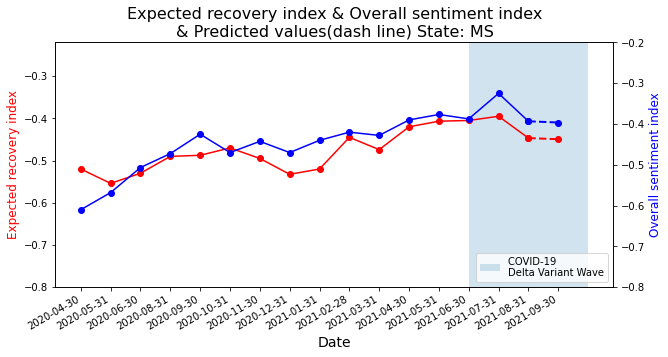

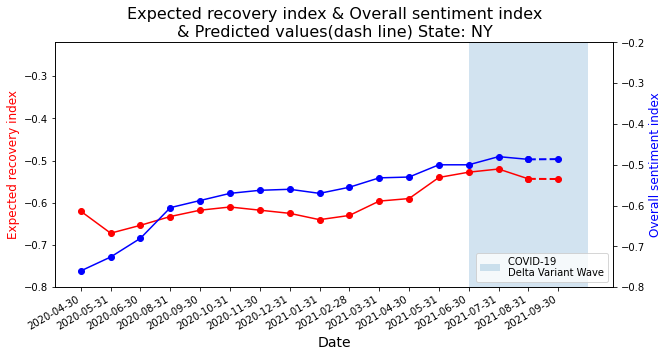

In [260]:
for state  in ['MS','NY']:
   feature_1 ='expected_recovery'
   feature_2 = 'overall_sentiment'
   title = 'Expected recovery index & Overall sentiment index'
   df_state = df_pred_to_graph.loc[df_pred_to_graph['state']==state,:]
   df_state = df_state[df_state.index <'2021-10-25']
   fig,ax = plt.subplots(figsize =(10,5))
   ax.plot(df_state[df_state.index <= '2021-08-31'].index, df_state[df_state.index <= '2021-08-31'][feature_1], color="red", marker="o")
   ax.plot(df_state[df_state.index >= '2021-08-31'].index,df_state[df_state.index >= '2021-08-31'][feature_1], marker='o',color='red', linewidth=2, linestyle = '--')
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-0.8,-0.22])
   ax.set_ylabel('Expected recovery index',color="red",fontsize=12)
    
   fmt_half_year = mdates.MonthLocator(interval=3)
   ax.xaxis.set_major_locator(fmt_half_year)

   # Minor ticks every month.
   fmt_month = mdates.MonthLocator()
   ax.xaxis.set_minor_locator(fmt_month)

   # Text in the x axis will be displayed in 'YYYY-mm' format.
   ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

   ax2=ax.twinx()
   ax2.plot(df_state[df_state.index <= '2021-08-31'].index, df_state[df_state.index <= '2021-08-31'][feature_2],color="blue",marker="o")
   ax2.plot(df_state[df_state.index >= '2021-08-31'].index,df_state[df_state.index >= '2021-08-31'][feature_2], marker='o',color='blue', linewidth=2, linestyle = '--')
   ax2.set_ylabel('Overall sentiment index',color="blue",fontsize=12)
   ax2.set_ylim([-0.8,-0.2])
   plt.title( title+ "\n" + "& Predicted values(dash line)"+ ' State: ' + state,fontsize=16)
   rect =ax.axvspan('2021-06-30', '2021-11-30', alpha=0.2)
   ax.legend([rect], ['COVID-19 \nDelta Variant Wave'], loc=4)
   fig.autofmt_xdate()
   plt.show()